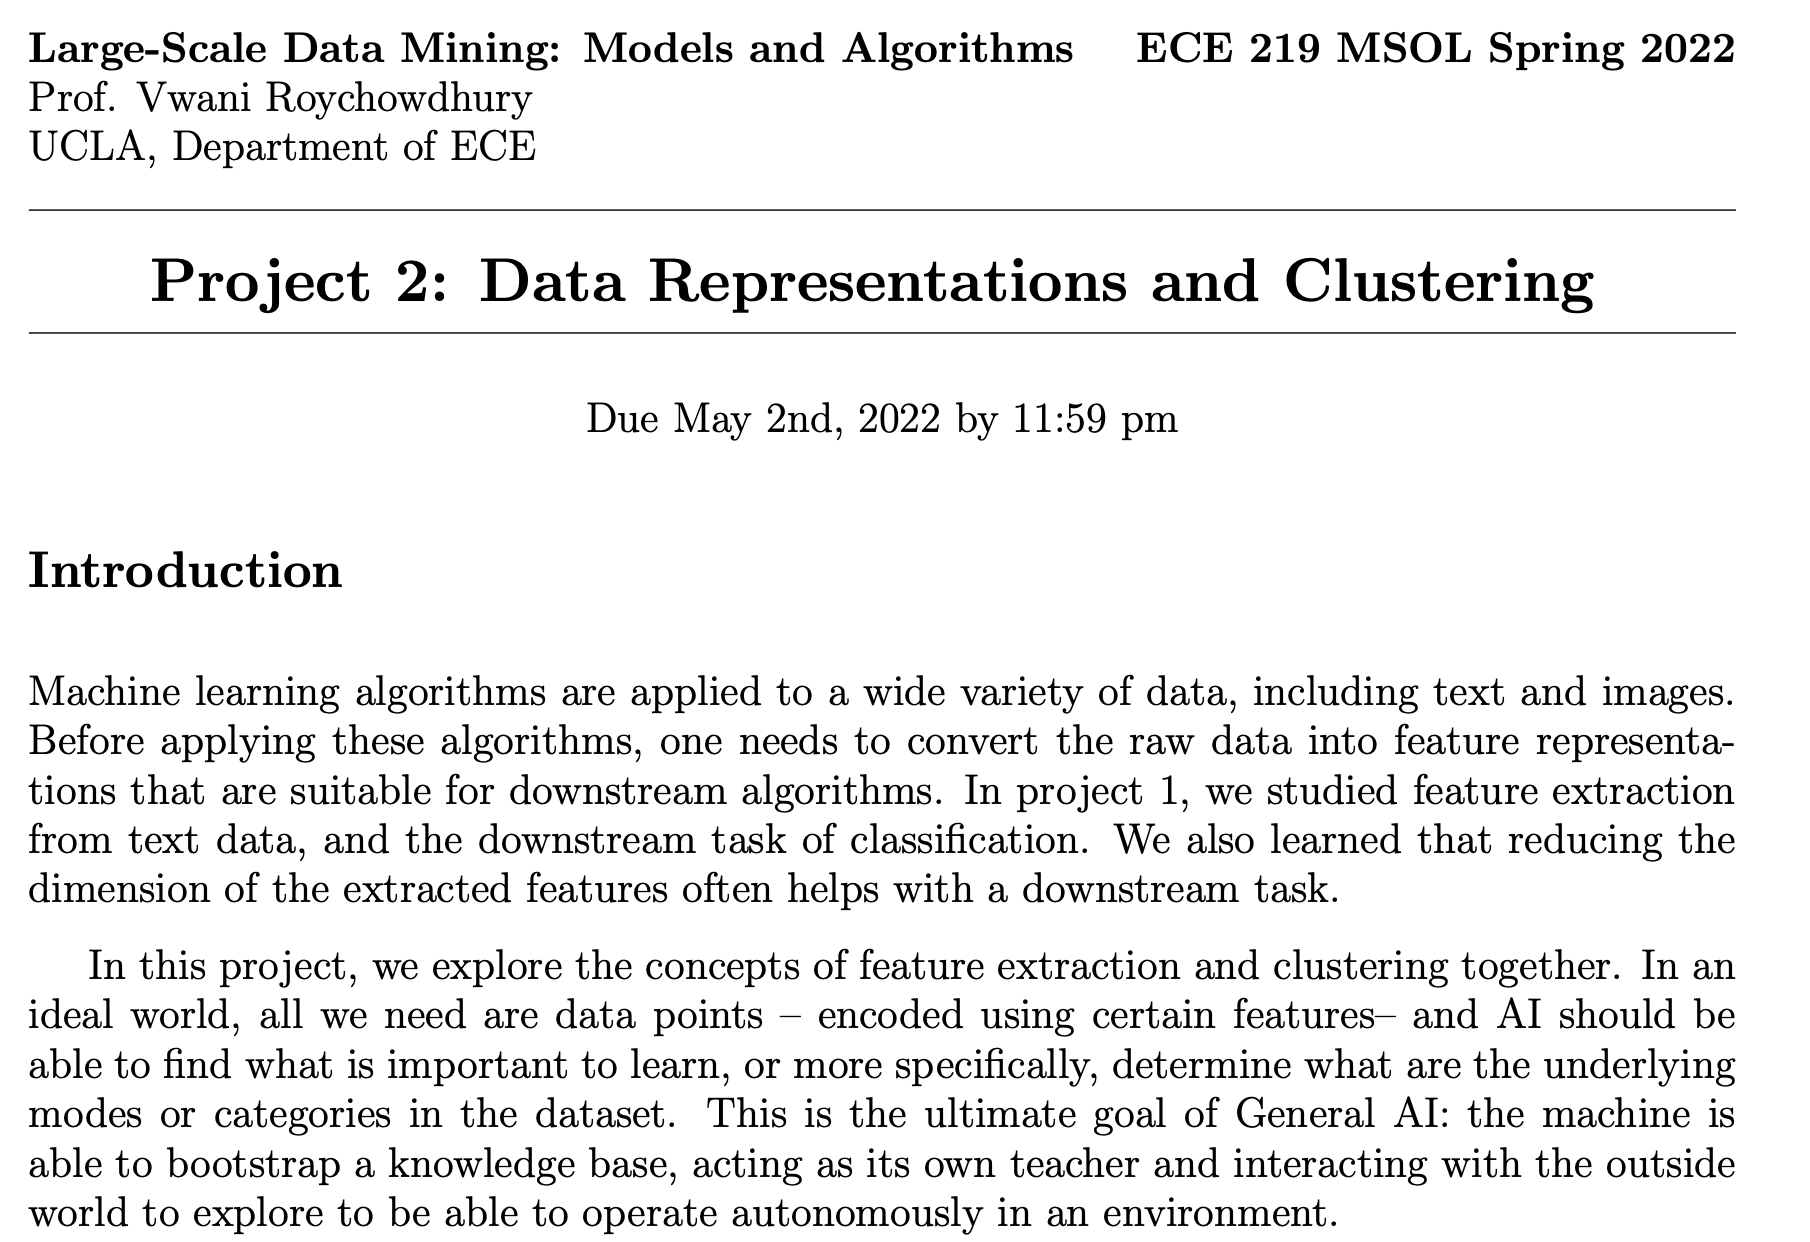

In [ ]:
!pip install umap-learn==0.5.0
!pip install numpy==1.20.0
!pip install scipy==1.5.4
!pip install scikit-learn==0.24.1
!pip install numba==0.52
!pip install pynndescent==0.5.1
!pip install tbb==2021.1.1

     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 7.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.0-py3-none-any.whl size=76334 sha256=1c3fb2e61ab13c4445566c26fb9ffcca4f47e0c6e2fee115fca692933aa522b4
  Stored in directory: /root/.cache/pip/wheels/ae/d7/10/0b474d56359c3caf8472e626dd0fd2dcc33d7a011f0458ac7d
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=be8451192d8ff9cc8887d80853b5fc730b18b717bd39a8e35621ebf41d71118e
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent
     |████████████████████████████████| 15.3 MB 72 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

     |████████████████████████████████| 25.9 MB 2.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.1 which is incompatible.
     |

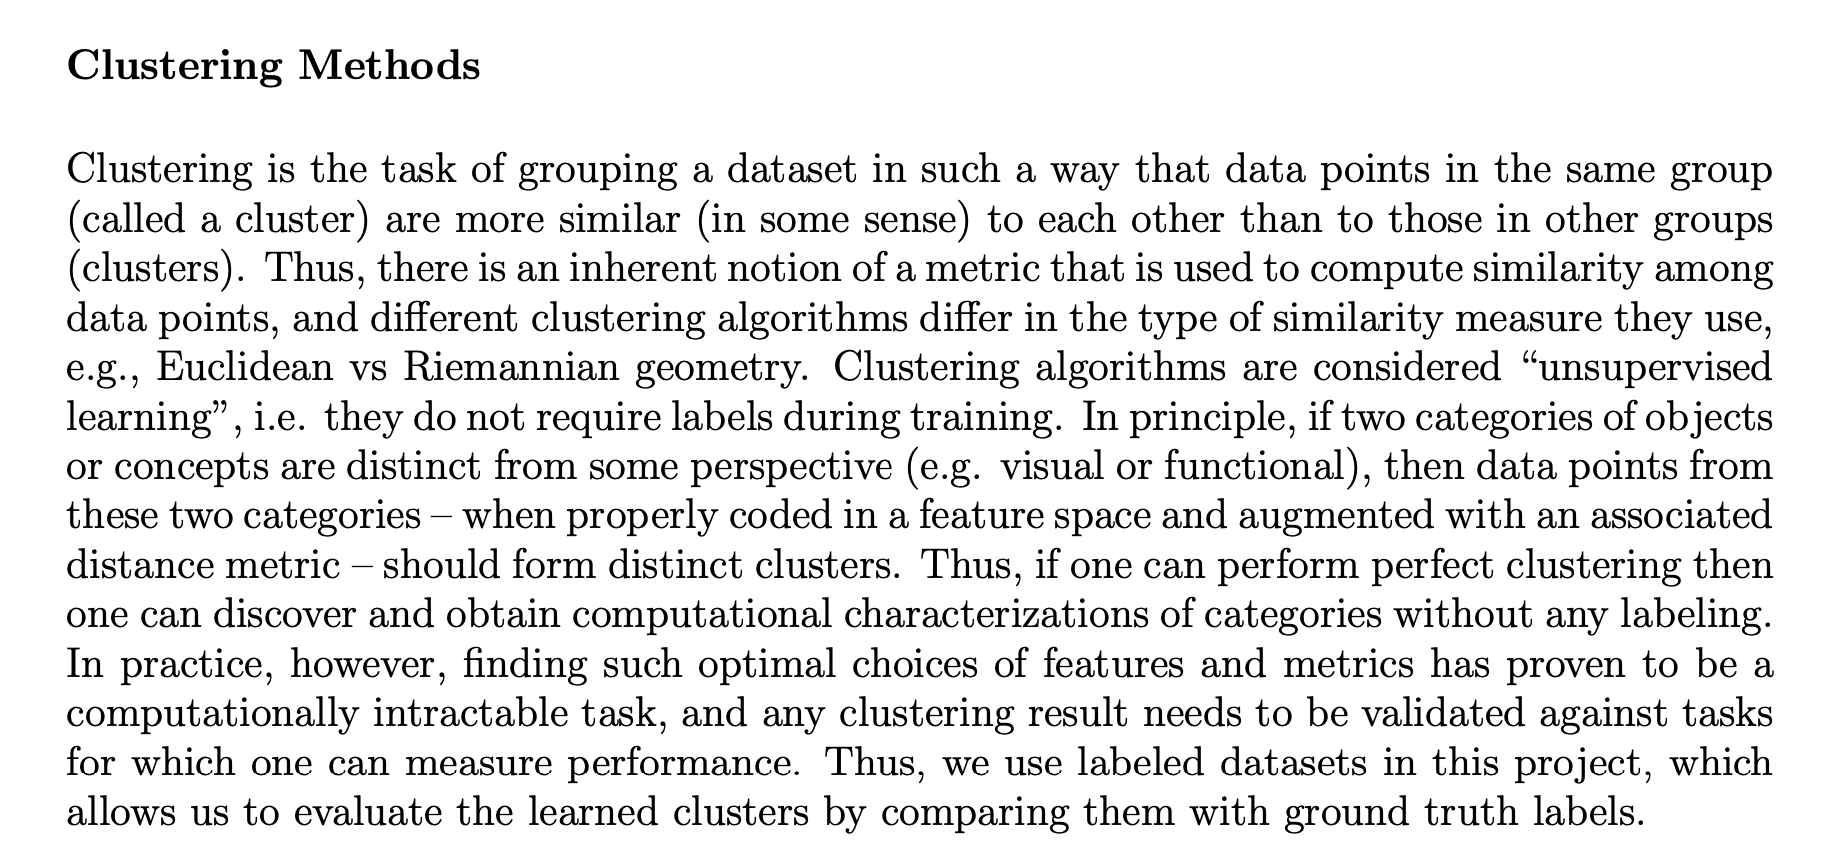

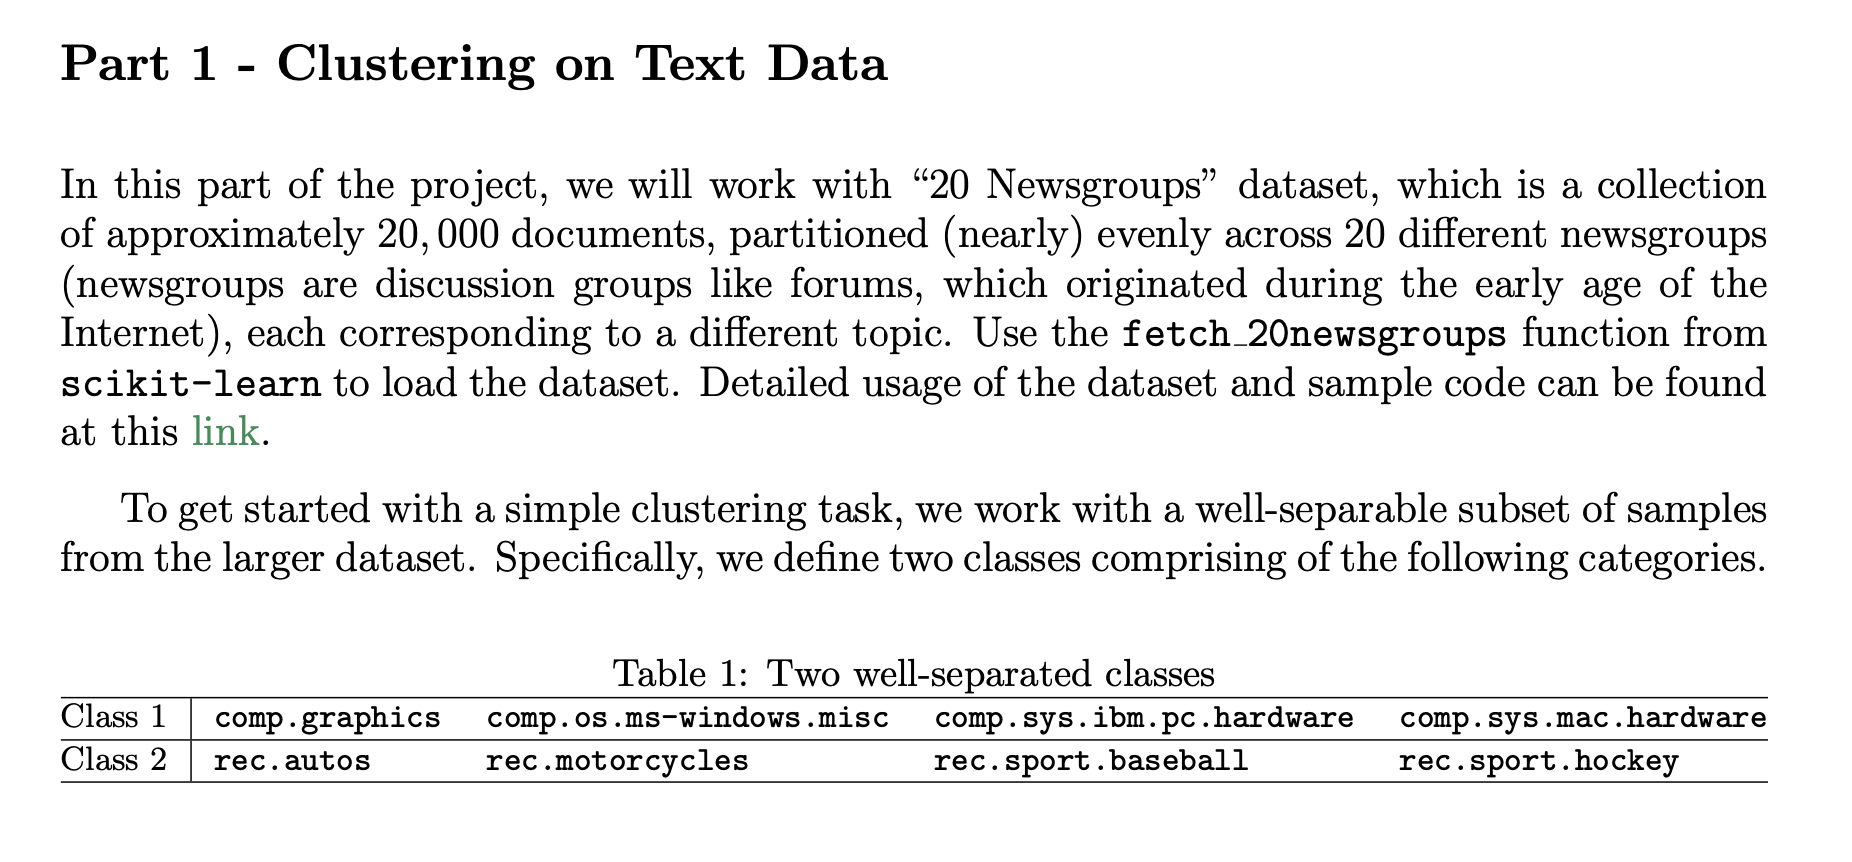

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
import numpy as np
from numpy import array

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils.extmath import randomized_svd


from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline


from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC # for problem 3

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score # recall scorer
from sklearn.metrics import precision_score # precision scorer
from sklearn.metrics import roc_curve # ROC curve
from sklearn.metrics import f1_score # f1

from nltk import pos_tag

from ast import literal_eval

import nltk
import string

nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


import itertools


import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

from tempfile import mkdtemp
from shutil import rmtree
from plotly.subplots import make_subplots
# from sklearn.externals.joblib import Memory

import time
import pickle
import re

# MinMaxScaler for negative values for LSI
from sklearn.preprocessing import MinMaxScaler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

PATH = 'drive/MyDrive/ECE219/Project2/'

os.chdir(PATH)

Mounted at /content/drive


In [ ]:
## Helper Functions
def preprocessing_doc(doc):
  wnl = nltk.wordnet.WordNetLemmatizer()
  doc = clean(doc)
  tokens = nltk.tokenize.word_tokenize(doc)
  tokens = [token.strip(string.punctuation) for token in tokens if token.isalnum()]
  return tokens

def clean(text):
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        texter = re.sub(r"<br />", " ", text)
        texter = re.sub(r"&quot;", "\"",texter)
        texter = re.sub('&#39;', "\"", texter)
        texter = re.sub('\n', " ", texter)
        texter = re.sub(' u '," you ", texter)
        texter = re.sub('`',"", texter)
        texter = re.sub(' +', ' ', texter)
        texter = re.sub(r"(!)\1+", r"!", texter)
        texter = re.sub(r"(\?)\1+", r"?", texter)
        texter = re.sub('&amp;', 'and', texter)
        texter = re.sub('\r', ' ',texter)
        clean = re.compile('<.*?>')
        texter = texter.encode('ascii', 'ignore').decode('ascii')
        texter = re.sub(clean, '', texter)
        if texter == "":
            texter = ""
        return texter

def evaluate(truth_labels, pred_labels, plot=True, print_output=True):
    homogeneity = metrics.homogeneity_score(pred_labels, truth_labels)
    completeness = metrics.completeness_score(pred_labels, truth_labels)
    v_measure = metrics.v_measure_score(pred_labels, truth_labels)
    adjusted_rand_score = metrics.adjusted_rand_score(pred_labels, truth_labels)
    adjusted_mi_score = metrics.adjusted_mutual_info_score(pred_labels, truth_labels)

    if print_output == True:
      print("Homogeneity: %0.3f" % homogeneity)
      print("Completeness: %0.3f" % completeness)
      print("V-measure: %0.3f" % v_measure)
      print("Adjusted Rand-Index: %.3f" % adjusted_rand_score)
      print("Adjusted Mutual Information Score: %.3f" % adjusted_mi_score)

    
    if plot==True:
      print("Contingency Table: ")
      A = contingency_table(truth_labels, pred_labels).astype(int)
          # print(plt.matshow(A, cmap=get_cmap('Blues')))
      plotmat.plot_mat(A, size=(5, 5), 
                          xlabel = 'nClusters', ylabel = 'nClasses', title = 'Contingency Table for kMeans')
    
    return homogeneity, completeness, v_measure, adjusted_rand_score, adjusted_mi_score

def contingency_table(true_labels, pred_cluster):
    n_clusters = len(np.unique(pred_cluster))
    n_classes = len(np.unique(true_labels))
    A = np.zeros(shape = (n_classes,n_clusters))
    class_labels = np.unique(true_labels)
    for i, cluster in enumerate(pred_cluster):
      A[true_labels[i]][cluster] +=1

    return A

def plot_scores(x, scores, title):
    data = []
    legend = ['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand', 'Adjusted Mutual Info']
    width, height = 800, 600

    for i in range(5):
        trace1 = go.Scatter(x=x, y=scores[i], 
                            mode='lines+markers', 
                            line=dict(width=2),
                            name=legend[i]
                           )
        data.append(trace1)
    
    layout = go.Layout(title=title,
                       autosize=False,
                       width=width,
                       height=height,
                       xaxis=dict(title='r', type='log', ticks='outside', mirror=True, linewidth=1, range = [0, 1.3]),
                       yaxis=dict(title='Scores', ticks='outside', mirror=True, linewidth=1, range=[0, 1]),
                       legend=dict(x=.7, y=.9, bordercolor='#D3D3D3', borderwidth=1))
    
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

def plot_clusters(X, k_means, title='Title',show_center = False, plot_by_cluster=True, num_Classes=None, truth_classes=None):
    colors = ['#92A8D1', '#F7CAC9', '#F7CAC9', '#F7CAC9', '#F7CAC9', 
              '#F7CAC9', '#e6194b', '#3cb44b', '#3cb44b', '#3cb44b', 
              '#3cb44b', '#ffe119', '#ffe119', '#ffe119', '#ffe119', 
              '#f58231', '#911eb4', '#911eb4', '#911eb4', '#911eb4']
    
    data = []
    legend = []

    if plot_by_cluster==True:
      loop_int = len(k_means.cluster_centers_)
    else:
      loop_int = num_Classes

    for k in range(loop_int):
        if plot_by_cluster == True:
          my_members = k_means.labels_ == k
          name = 'cluster ' + str(k)
          legend.append(name)
        else:
          my_members = truth_classes == k
          name = 'class ' + str(k)
          legend.append(name)
        cluster_center = k_means.cluster_centers_[k]
        kmeans1 = go.Scatter(x=X[my_members, 0], y=X[my_members, 1],
                              showlegend=True,
                              mode='markers', 
                              marker=dict(color=colors[k], size=4), 
                              name=name)
      
        kmeans2 = go.Scatter(x=[cluster_center[0]], y=[cluster_center[1]],
                             showlegend=False,
                             mode='markers', 
                             marker=dict(color=colors[k], size=14, 
                                         line=dict(color='black', width=1)))
        data.append(kmeans1)
        if show_center: data.append(kmeans2)
    layout = go.Layout(title=title,
                       autosize=False,
                       width=700,
                       height=700,
                       xaxis=dict(showticklabels=True, ticks='', zeroline=False, showgrid=True),
                       yaxis=dict(showticklabels=True, ticks='', zeroline=False, showgrid=True),
                       legend=dict(x=.5, y=.5, bordercolor='#D3D3D3', borderwidth=1))

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

def plot_embedding(X, title='Title', num_Classes=None, truth_classes=None):
    colors = ['#92A8D1', '#e6194b', '#F7CAC9', '#ffe119', '#f58231']
    
    data = []
    legend = []

    for k in range(num_Classes):
        my_members = truth_classes == k
        name = 'class ' + str(k+1)
        tsne = go.Scatter(x=X[my_members, 0], y=X[my_members, 1],
                              showlegend=True,
                              mode='markers', 
                              marker=dict(color=colors[k], size=4), 
                              name=name)
      
        data.append(tsne)
  
    layout = go.Layout(title=title,
                       autosize=False,
                       width=700,
                       height=700,
                       xaxis=dict(showticklabels=True, ticks='', zeroline=False, showgrid=True),
                       yaxis=dict(showticklabels=True, ticks='', zeroline=False, showgrid=True),
                       legend=dict(x=.9, y=.1, bordercolor='#D3D3D3', borderwidth=1))

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

def impute_nan(matrix):
  col_mean = np.nanmean(matrix, axis=0)
  inds = np.where(np.isnan(matrix))

  #Place column means in the indices. Align the arrays using take
  matrix[inds] = np.take(col_mean, inds[1])
  return matrix

## Preprocessing and Fetching Data

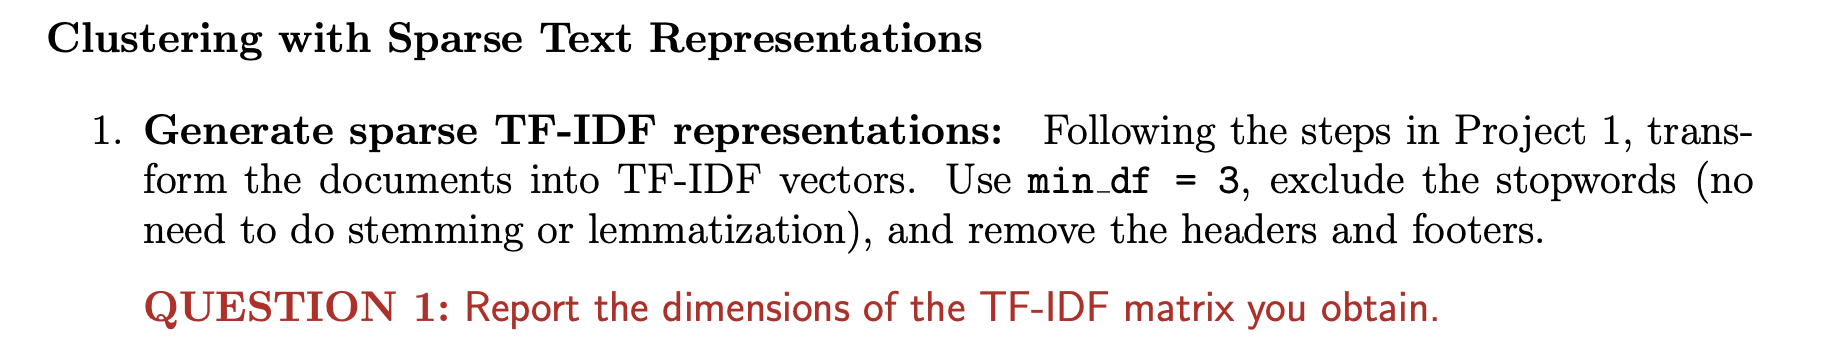

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

vfunc = np.vectorize(lambda t : int(t / 4))
truth_classes = vfunc(newsgroups.target)

print(newsgroups.target_names)

['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']


In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

min_df = 3
tfidfVectorizer = TfidfVectorizer(min_df=min_df, stop_words = 'english', tokenizer=preprocessing_doc)
tfidfVectors = tfidfVectorizer.fit_transform(newsgroups.data)
print(tfidfVectors.shape)

(7882, 15164)


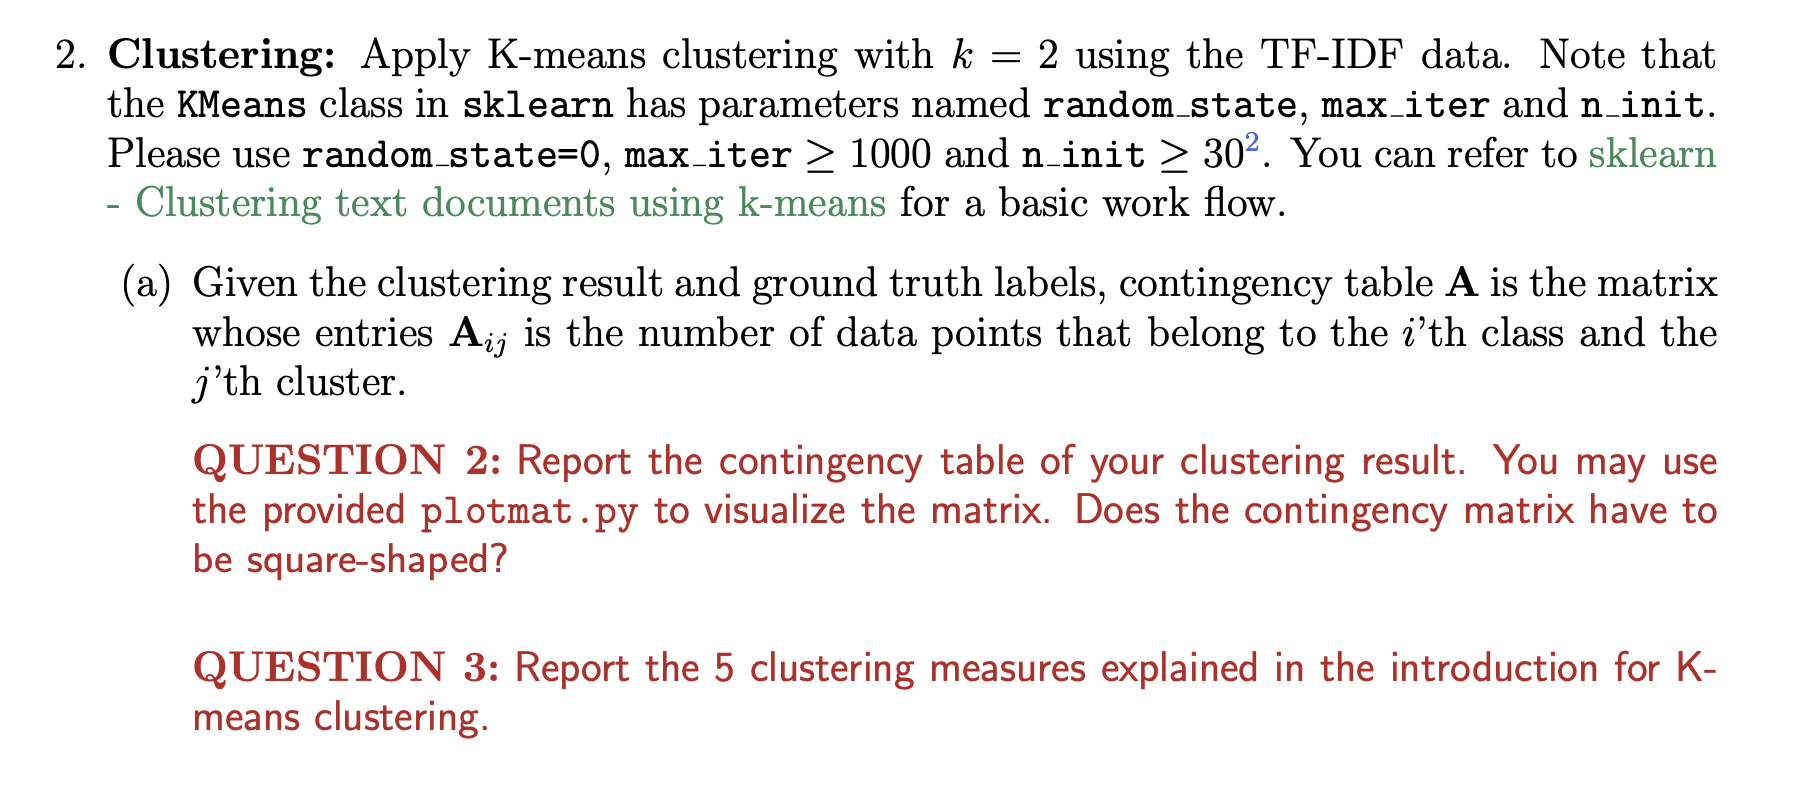

Homogeneity: 0.439
Completeness: 0.394
V-measure: 0.415
Adjusted Rand-Index: 0.387
Adjusted Mutual Information Score: 0.415
Contingency Table: 


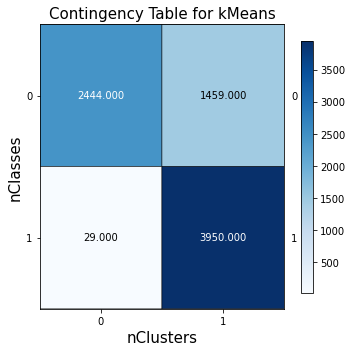

(0.43886711879539125,
 0.3938912643068315,
 0.41516465710269157,
 0.3873453204443865,
 0.4151082209730021)

In [ ]:
%matplotlib inline
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
import plotmat

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(tfidfVectors)

evaluate(truth_classes, kmeans.labels_)


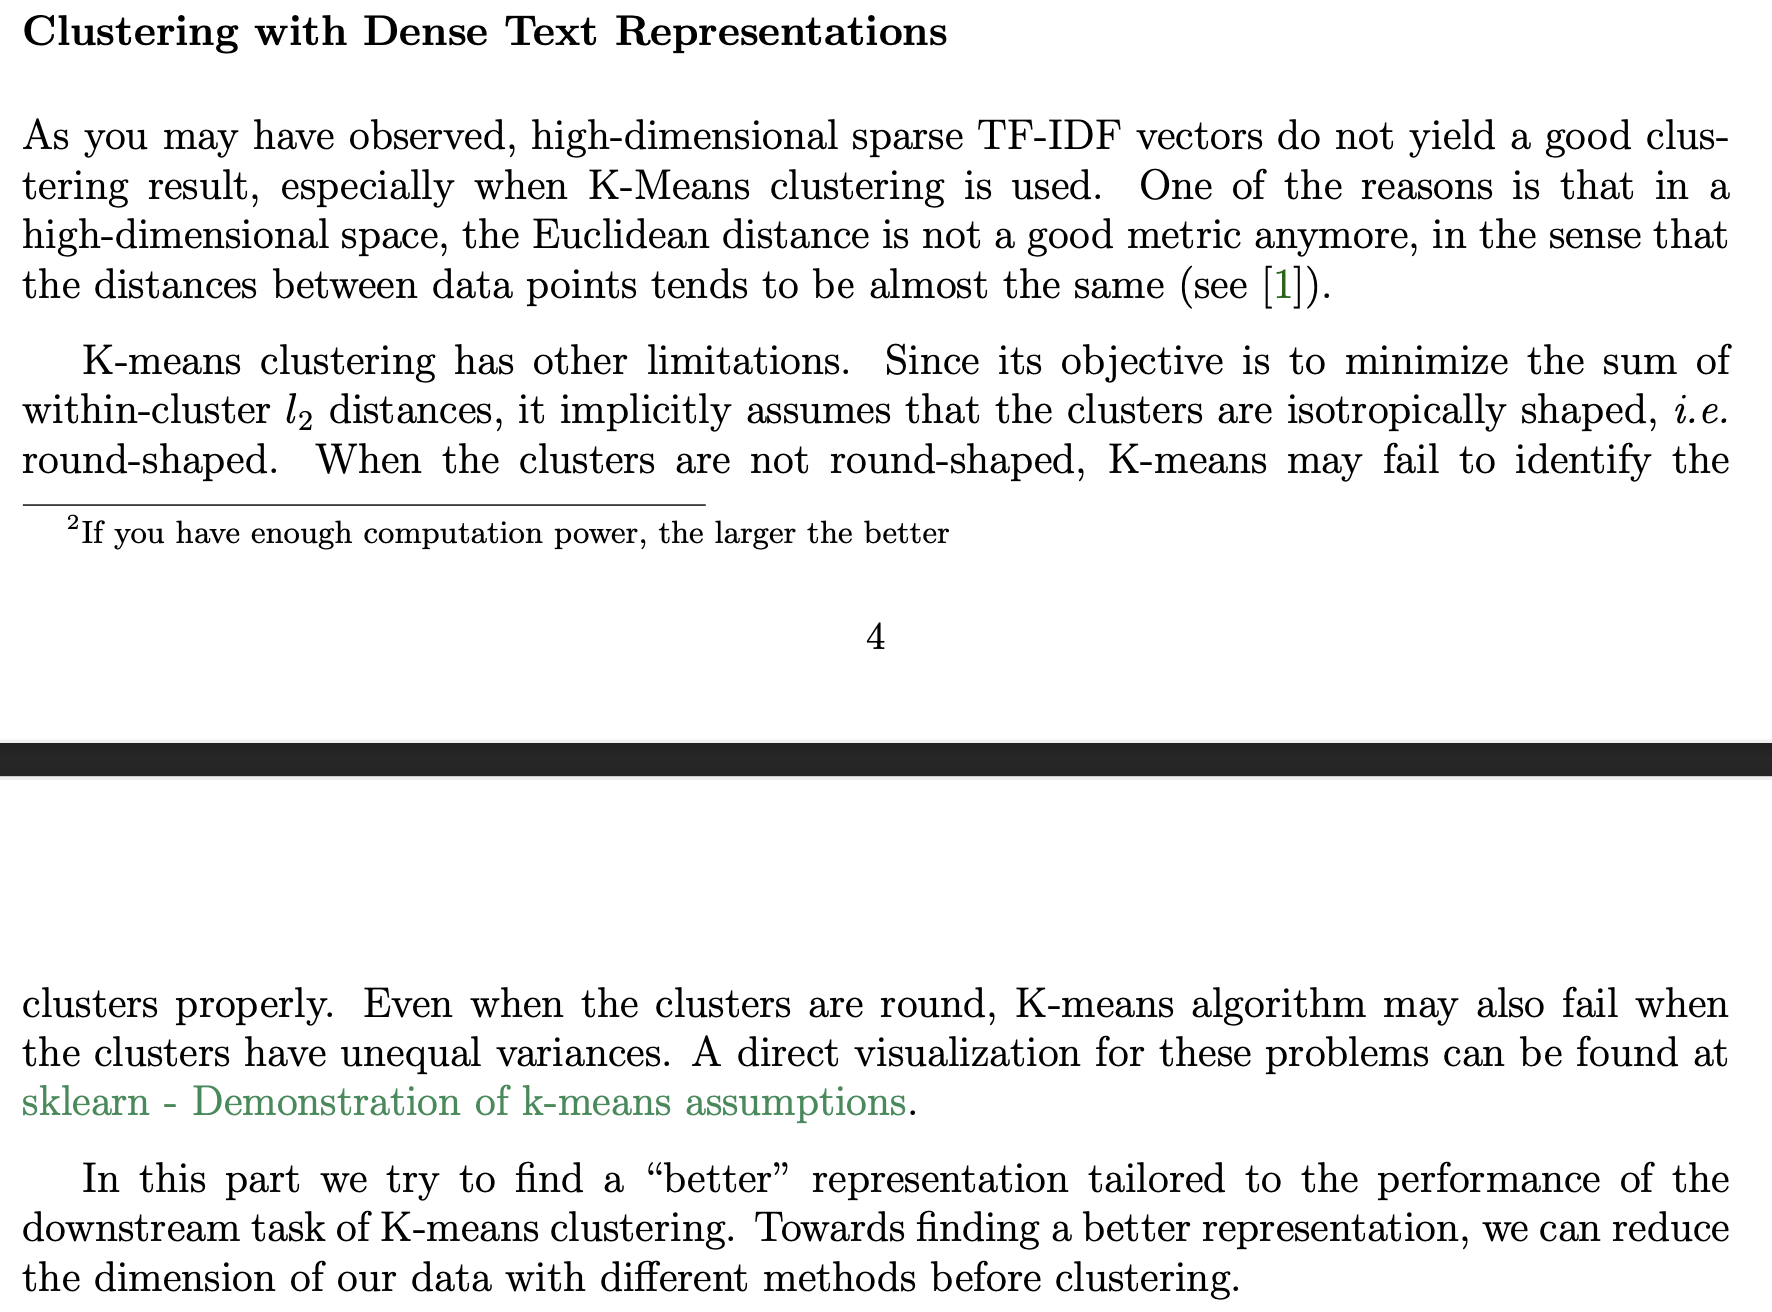

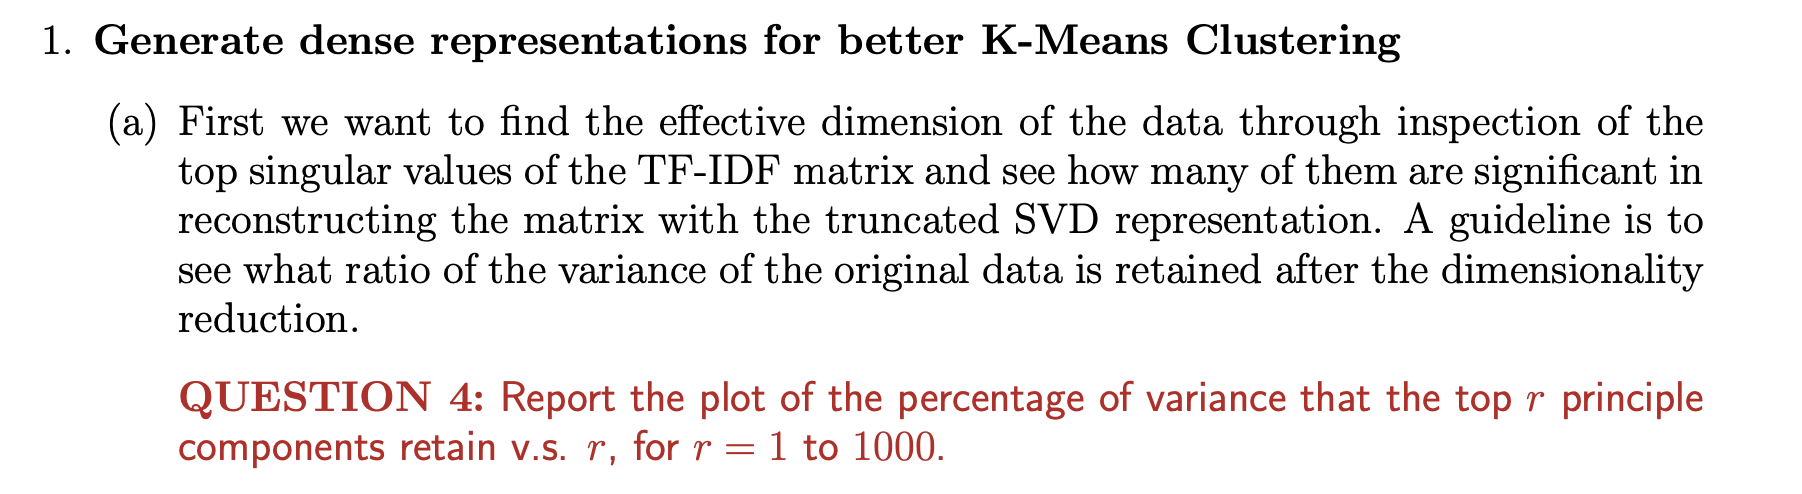

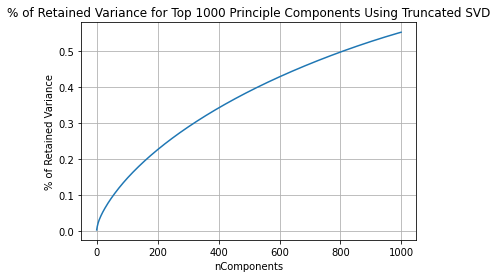

In [ ]:
%matplotlib inline

from sklearn.decomposition import TruncatedSVD

variance_ratios = []

svd = TruncatedSVD(n_components = 1000, random_state = 0)
lsi = svd.fit_transform(tfidfVectors)

plt.plot(np.cumsum(svd.explained_variance_ratio_[:1000]))
plt.title('% of Retained Variance for Top 1000 Principle Components Using Truncated SVD')
plt.xlabel('nComponents')
plt.ylabel('% of Retained Variance')
plt.grid(True)

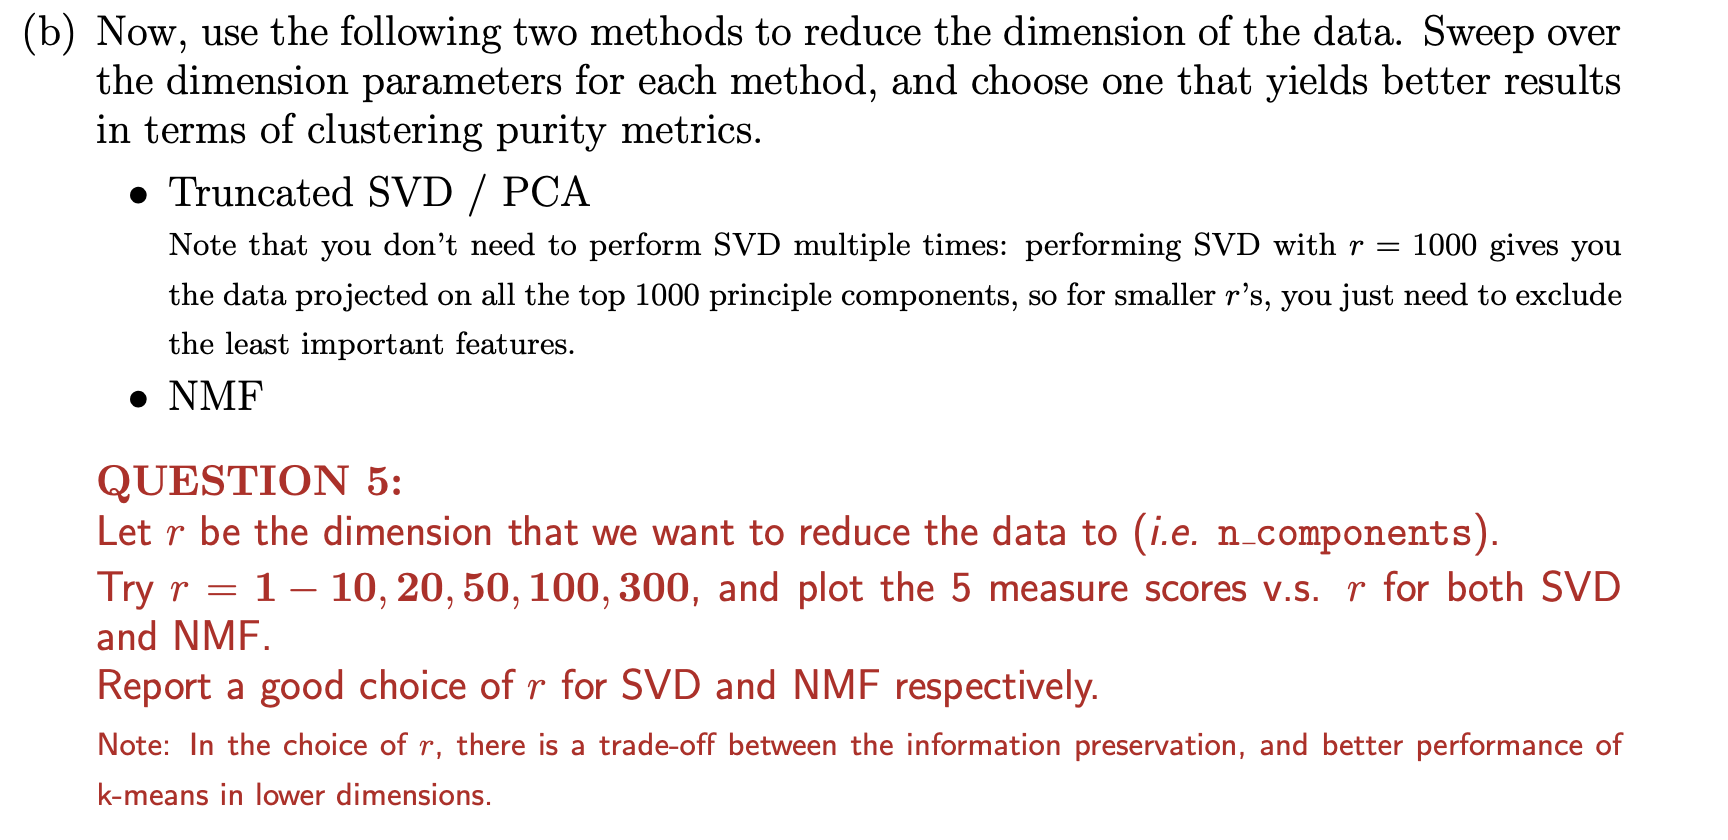

In [ ]:
from sklearn.decomposition import TruncatedSVD

r = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]
svd_scores = [[], [], [], [], []]

for nc in r:
  kmeans.fit(lsi[:, :nc])
  h, c, v, ar, am = evaluate(truth_classes, kmeans.labels_, plot=False, print_output=False)

  svd_scores[0].append(h)
  svd_scores[1].append(c)
  svd_scores[2].append(v)
  svd_scores[3].append(ar)
  svd_scores[4].append(am)



plot_scores(r, svd_scores, 'SVD nComponents vs Classification Scores')

In [ ]:
from sklearn.decomposition import NMF

r = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]
nmf_scores = [[], [], [], [], []]

for nc in r:
  nmf = NMF(n_components = nc, init='random', random_state=0, max_iter=500)
  nmf_vec = nmf.fit_transform(tfidfVectors)
  kmeans.fit(nmf_vec)
  h, c, v, ar, am = evaluate(truth_classes, kmeans.labels_, plot=False, print_output=False)

  nmf_scores[0].append(h)
  nmf_scores[1].append(c)
  nmf_scores[2].append(v)
  nmf_scores[3].append(ar)
  nmf_scores[4].append(am)

plot_scores(r, nmf_scores, 'NMF nComponents vs Classification Scores')

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning:

Maximum number of iterations 500 reached. Increase it to improve convergence.



In [ ]:
# Avg. SVD Performance

print('Avg Homogeneity: ', np.mean(svd_scores[0][1:]))
print('Avg Completeness: ', np.mean(svd_scores[1][1:]))
print('Avg V-Measure: ', np.mean(svd_scores[2][1:]))
print('Avg Adjusted Rand Index: ', np.mean(svd_scores[3][1:]))
print('Avg Mutual Information Score: ', np.mean(svd_scores[4][1:]))

Avg Homogeneity:  0.4325103893432901
Avg Completeness:  0.3895342392957643
Avg V-Measure:  0.40987656941233913
Avg Adjusted Rand Index:  0.38816928380654186
Avg Mutual Information Score:  0.4098197062367375


In [ ]:
# Avg. NMF Performance

print('Avg Homogeneity: ', np.mean(nmf_scores[0][1:]))
print('Avg Completeness: ', np.mean(nmf_scores[1][1:]))
print('Avg V-Measure: ', np.mean(nmf_scores[2][1:]))
print('Avg Adjusted Rand Index: ', np.mean(nmf_scores[3][1:]))
print('Avg Mutual Information Score: ', np.mean(nmf_scores[4][1:]))

Avg Homogeneity:  0.23250468652207795
Avg Completeness:  0.1264499844842667
Avg V-Measure:  0.15507079861122217
Avg Adjusted Rand Index:  0.089890684738567
Avg Mutual Information Score:  0.1549595148363248


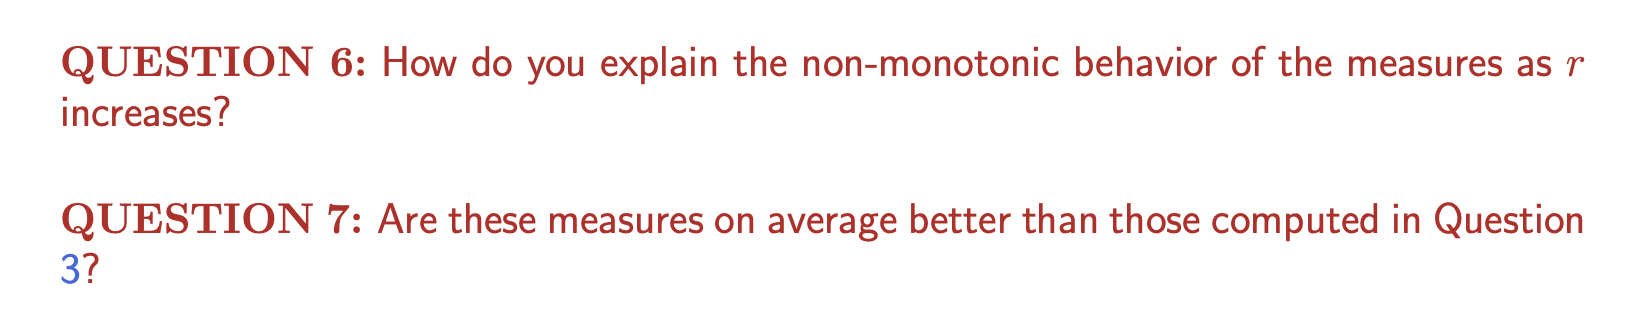

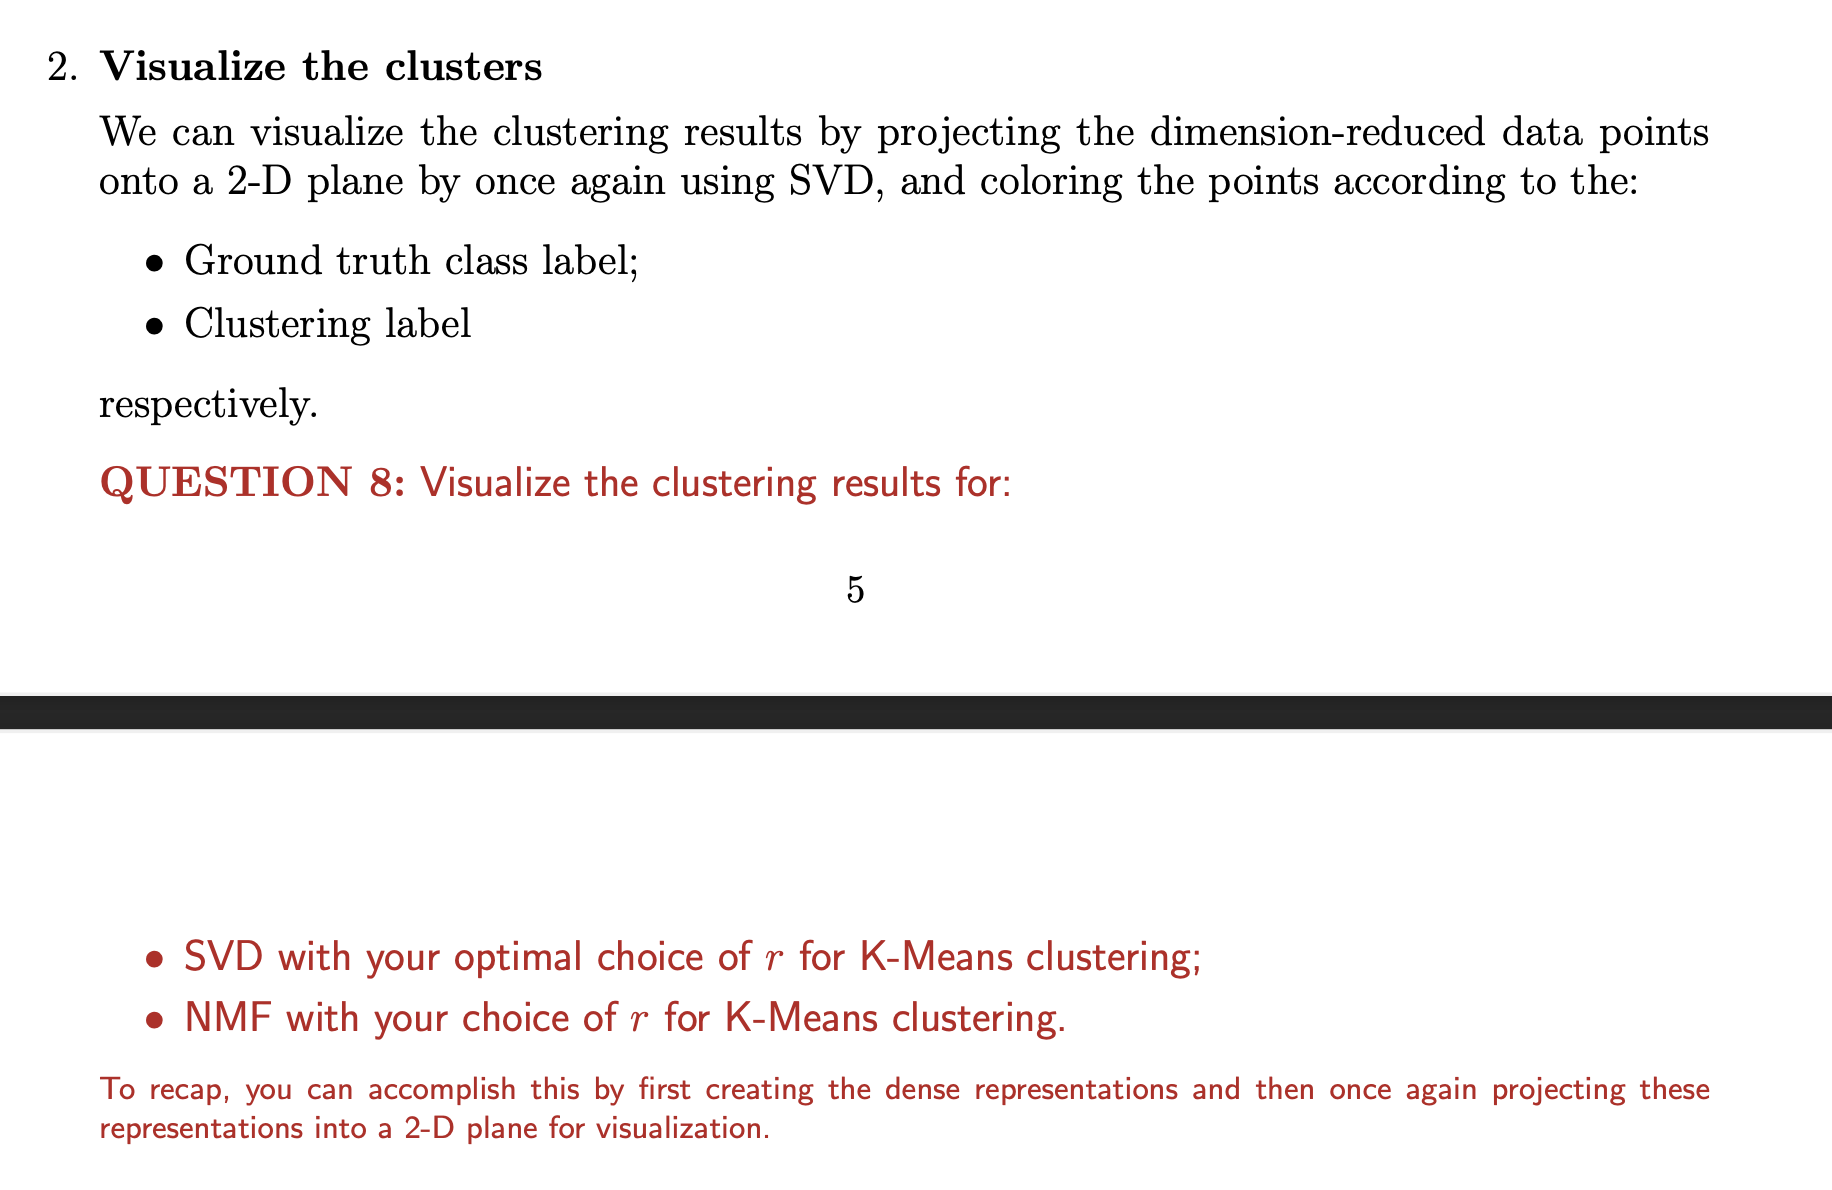

In [ ]:
svd = TruncatedSVD(n_components = 3, random_state = 0)
lsi = svd.fit_transform(tfidfVectors)

kmeans.fit(lsi)

evaluate(truth_classes, kmeans.labels_, plot=False, print_output=True)

Homogeneity: 0.438
Completeness: 0.400
V-measure: 0.418
Adjusted Rand-Index: 0.410
Adjusted Mutual Information Score: 0.418


(0.4376701579750813,
 0.3999469090942156,
 0.4179590740608183,
 0.4100993302867602,
 0.4179033861358983)

In [ ]:
svd_projected = TruncatedSVD(n_components = 2, n_iter = 7, random_state = 0)
lsi_projected = svd_projected.fit_transform(lsi)
plot_clusters(lsi_projected, kmeans, 'KMeans Results Colored by Class', show_center=False, plot_by_cluster=False, num_Classes=2, truth_classes=truth_classes)
# X, k_means, title='Title',show_center = False, plot_by_cluster=True, num_Classes=None, truth_classes=None

In [ ]:
nmf = NMF(n_components = 3, init='random', random_state=0)
nmf_vec = nmf.fit_transform(tfidfVectors)
kmeans.fit(nmf_vec)

evaluate(truth_classes, kmeans.labels_, plot=False, print_output=True)

Homogeneity: 0.444
Completeness: 0.410
V-measure: 0.427
Adjusted Rand-Index: 0.429
Adjusted Mutual Information Score: 0.427


(0.4442180857656158,
 0.41031362725346265,
 0.42659325870568415,
 0.42916901504937144,
 0.4265386785346408)

In [ ]:
nmf_projected = NMF(n_components = 2, init='random', random_state=0)
nmf_vec_proj = nmf_projected.fit_transform(nmf_vec)
plot_clusters(nmf_vec_proj, kmeans, 'KMeans Results Colored by Class', show_center=False, plot_by_cluster=False, num_Classes=2, truth_classes=truth_classes)
# X, k_means, title='Title',show_center = False, plot_by_cluster=True, num_Classes=None, truth_classes=None

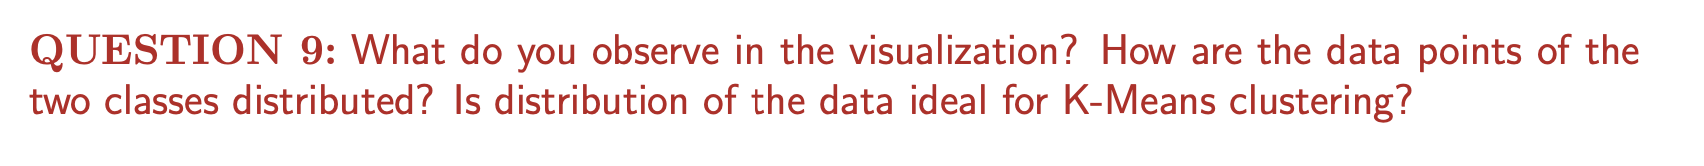

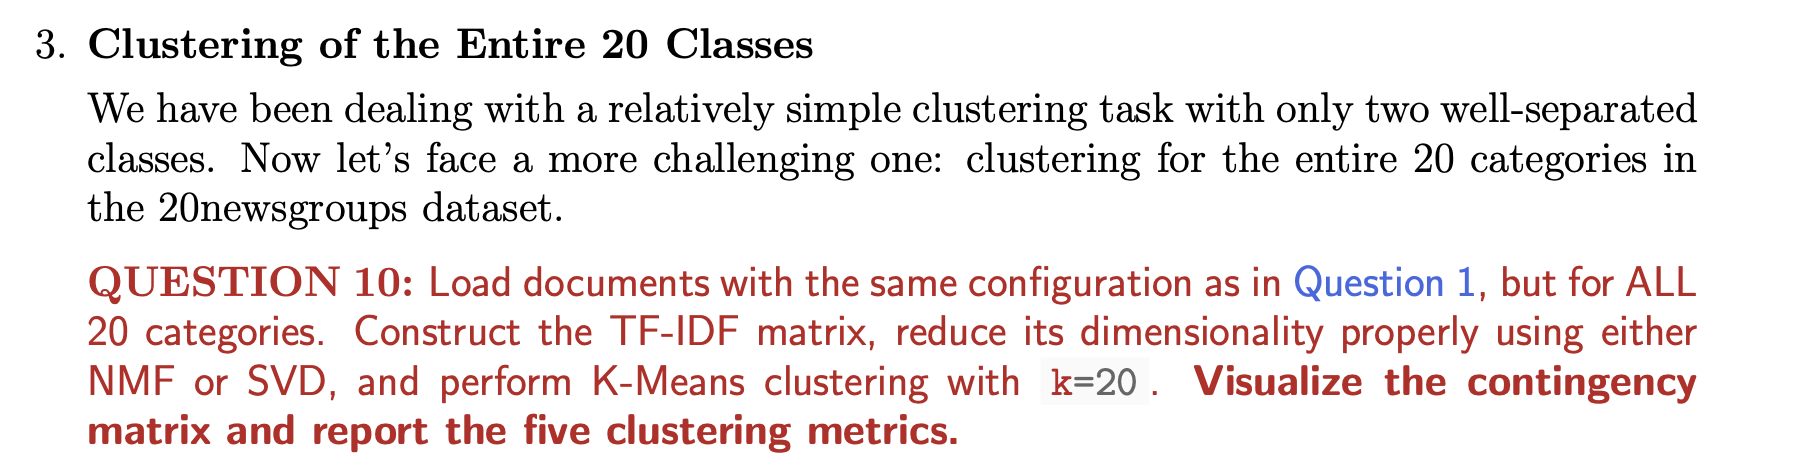

In [ ]:
# 20 classes
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
labels = newsgroups_data.target
truth_classes = newsgroups_data.target_names
print(truth_classes)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

min_df = 3
tfidfVectorizer = TfidfVectorizer(min_df=min_df, stop_words = 'english', tokenizer=preprocessing_doc)
tfidfVectors = tfidfVectorizer.fit_transform(newsgroups_data.data)
print(tfidfVectors.shape)

kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)

(18846, 31015)


In [ ]:
from sklearn.cluster import KMeans

svd = TruncatedSVD(n_components = 3, random_state = 0)
lsi = svd.fit_transform(tfidfVectors)

kmeans.fit(lsi)

evaluate(labels, kmeans.labels_, plot=False, print_output=True)

Homogeneity: 0.215
Completeness: 0.195
V-measure: 0.204
Adjusted Rand-Index: 0.062
Adjusted Mutual Information Score: 0.202


(0.21549544192214432,
 0.1945002015589191,
 0.20446025490912953,
 0.06235478814714955,
 0.20172823832467474)

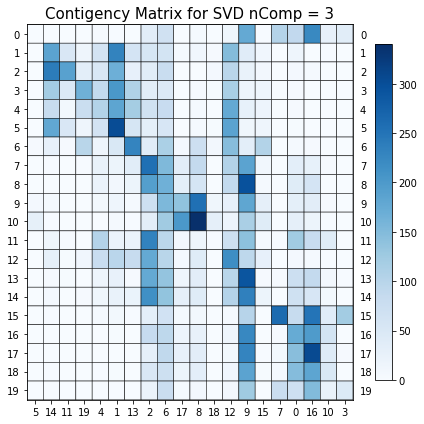

In [ ]:
import numpy as np
from plotmat import plot_mat
from scipy.optimize import linear_sum_assignment

A = contingency_table(labels, kmeans.labels_)
rows, cols = linear_sum_assignment(A, maximize=True)
plot_mat(A[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Contigency Matrix for SVD nComp = 3', if_show_values = False, size=(6,6))

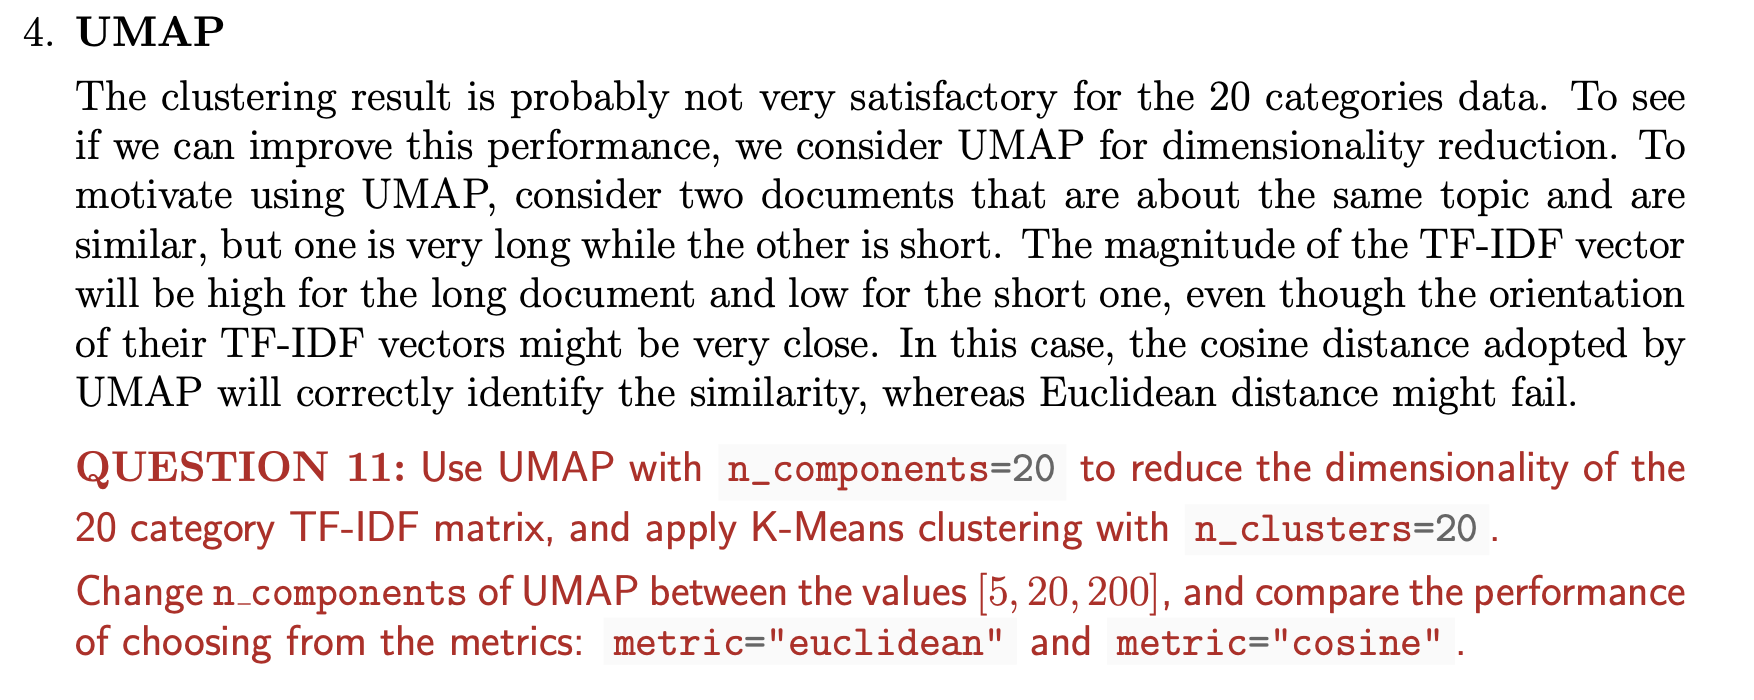

nComp = 5, Metric = Euclidian

Homogeneity: 0.007
Completeness: 0.007
V-measure: 0.007
Adjusted Rand-Index: 0.000
Adjusted Mutual Information Score: 0.004


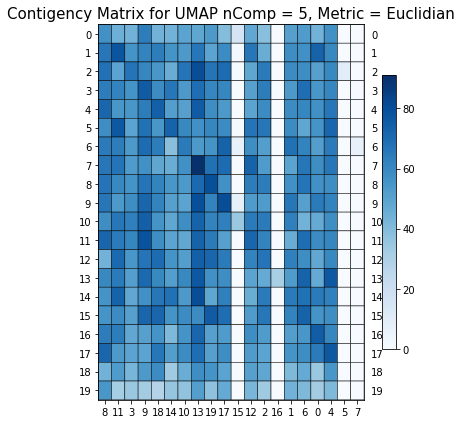

In [ ]:
import umap
# import umap.plot
import plotly.express as px
from sklearn.cluster import KMeans

proj_vec = umap.UMAP(n_components=5, spread=5, min_dist=0.01, a=50, b=.9, metric="euclidean").fit_transform(tfidfVectors)
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=20)

kmeans.fit(proj_vec)

evaluate(labels, kmeans.labels_, plot=False, print_output=True)

A = contingency_table(labels, kmeans.labels_)
rows, cols = linear_sum_assignment(A, maximize=True)
plot_mat(A[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Contigency Matrix for UMAP nComp = 5, Metric = Euclidian', if_show_values = False, size=(6,6))

nComp = 20, Metric = Euclidian

Homogeneity: 0.008
Completeness: 0.007
V-measure: 0.007
Adjusted Rand-Index: 0.000
Adjusted Mutual Information Score: 0.004


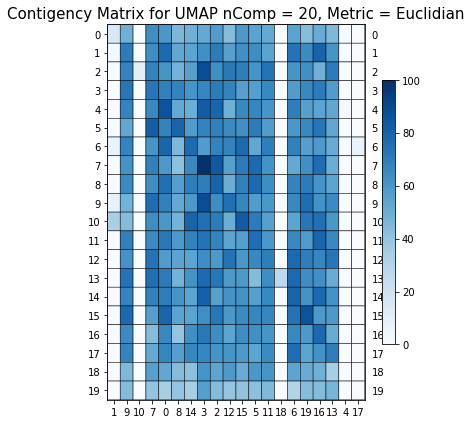

In [ ]:
import umap
import plotly.express as px

proj_vec = umap.UMAP(n_components=20, spread=5, min_dist=0.01, a=50, b=.9, metric="euclidean").fit_transform(tfidfVectors)

kmeans.fit(proj_vec)

evaluate(labels, kmeans.labels_, plot=False, print_output=True)

A = contingency_table(labels, kmeans.labels_)
rows, cols = linear_sum_assignment(A, maximize=True)
plot_mat(A[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Contigency Matrix for UMAP nComp = 20, Metric = Euclidian', if_show_values = False, size=(6,6))

nComp = 200, Metric = Euclidian

Homogeneity: 0.006
Completeness: 0.005
V-measure: 0.006
Adjusted Rand-Index: 0.000
Adjusted Mutual Information Score: 0.003


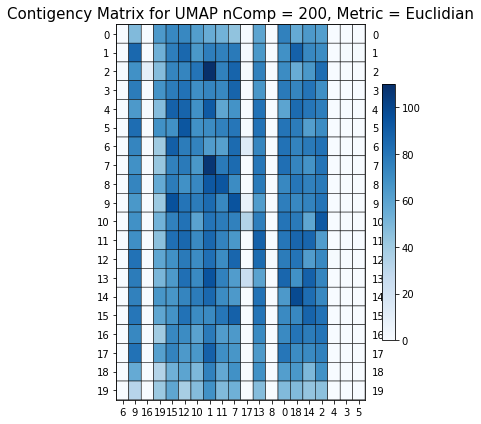

In [ ]:
import umap
import plotly.express as px

proj_vec = umap.UMAP(n_components=200, spread=5, min_dist=0.01, a=50, b=.9, metric="euclidean").fit_transform(tfidfVectors)

kmeans.fit(proj_vec)

evaluate(labels, kmeans.labels_, plot=False, print_output=True)

A = contingency_table(labels, kmeans.labels_)
rows, cols = linear_sum_assignment(A, maximize=True)
plot_mat(A[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Contigency Matrix for UMAP nComp = 200, Metric = Euclidian', if_show_values = False, size=(6,6))

nComp = 5, Metric = Cosine

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:126: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 724 edges.
It has only fully disconnected 21 vertices.
Use umap.utils.disconnected_vertices() to identify them.



Homogeneity: 0.438
Completeness: 0.424
V-measure: 0.431
Adjusted Rand-Index: 0.278
Adjusted Mutual Information Score: 0.429


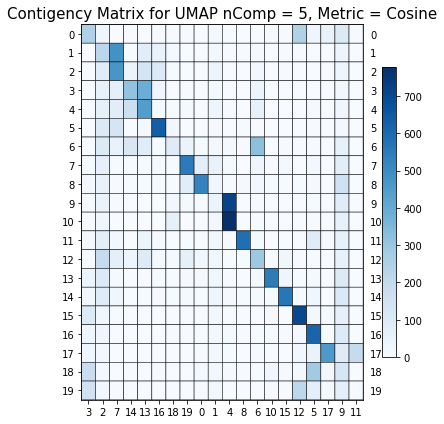

In [ ]:
import umap
import plotly.express as px

# removed_0_rows = tfidfVectors[tfidfVectors.getnnz(1)>0][:,tfidfVectors.getnnz(0)>0]
proj_vec = umap.UMAP(n_components=5, metric="cosine").fit_transform(tfidfVectors)

proj_vec = impute_nan(proj_vec)
kmeans.fit(proj_vec)

evaluate(labels, kmeans.labels_, plot=False, print_output=True)

A = contingency_table(labels, kmeans.labels_)
rows, cols = linear_sum_assignment(A, maximize=True)
plot_mat(A[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Contigency Matrix for UMAP nComp = 5, Metric = Cosine', if_show_values = False, size=(6,6))

nComp = 20, Metric = Cosine

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:126: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 785 edges.
It has only fully disconnected 24 vertices.
Use umap.utils.disconnected_vertices() to identify them.



Homogeneity: 0.422
Completeness: 0.410
V-measure: 0.416
Adjusted Rand-Index: 0.259
Adjusted Mutual Information Score: 0.414


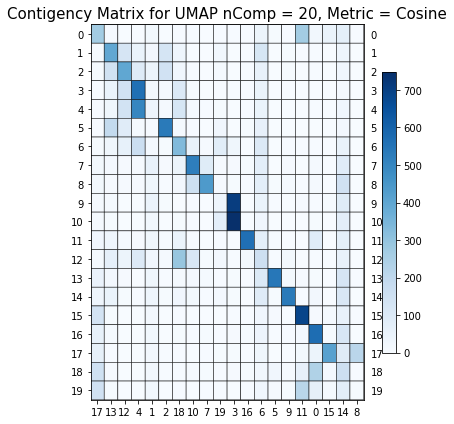

In [ ]:
import umap
import plotly.express as px

proj_vec = umap.UMAP(n_components=20, spread=5, min_dist=0.01, a=50, b=.9, metric="cosine").fit_transform(tfidfVectors)

proj_vec = impute_nan(proj_vec)
kmeans.fit(proj_vec)

evaluate(labels, kmeans.labels_, plot=False, print_output=True)

A = contingency_table(labels, kmeans.labels_)
rows, cols = linear_sum_assignment(A, maximize=True)
plot_mat(A[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Contigency Matrix for UMAP nComp = 20, Metric = Cosine', if_show_values = False, size=(6,6))

nComp = 200, Metric = Cosine

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:126: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 770 edges.
It has only fully disconnected 29 vertices.
Use umap.utils.disconnected_vertices() to identify them.



Homogeneity: 0.417
Completeness: 0.403
V-measure: 0.410
Adjusted Rand-Index: 0.264
Adjusted Mutual Information Score: 0.408


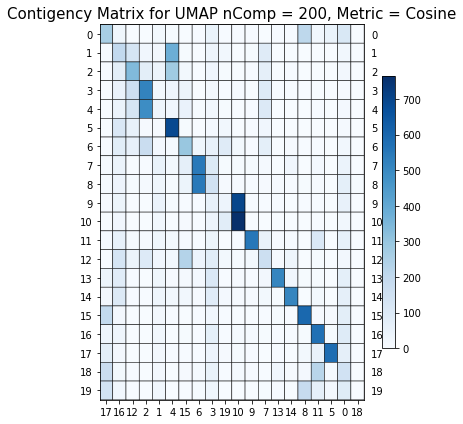

In [ ]:
import umap
import plotly.express as px

proj_vec = umap.UMAP(n_components=200, spread=5, min_dist=0.01, a=50, b=.9, metric="cosine").fit_transform(tfidfVectors)

col_mean = np.nanmean(proj_vec, axis=0)
inds = np.where(np.isnan(proj_vec))

#Place column means in the indices. Align the arrays using take
proj_vec[inds] = np.take(col_mean, inds[1])

proj_vec = impute_nan(proj_vec)
kmeans.fit(proj_vec)

evaluate(labels, kmeans.labels_, plot=False, print_output=True)

A = contingency_table(labels, kmeans.labels_)
rows, cols = linear_sum_assignment(A, maximize=True)
plot_mat(A[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Contigency Matrix for UMAP nComp = 200, Metric = Cosine', if_show_values = False, size=(6,6))

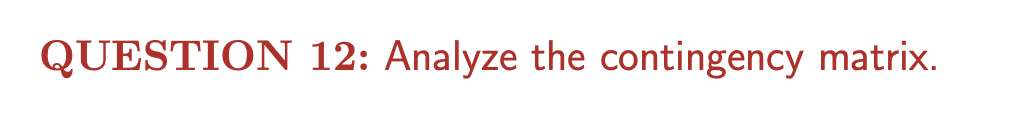

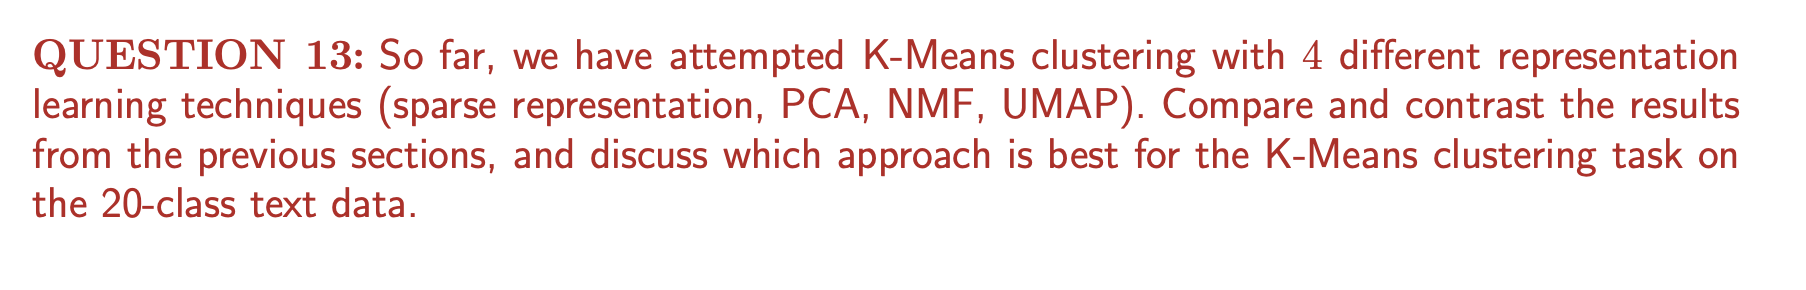

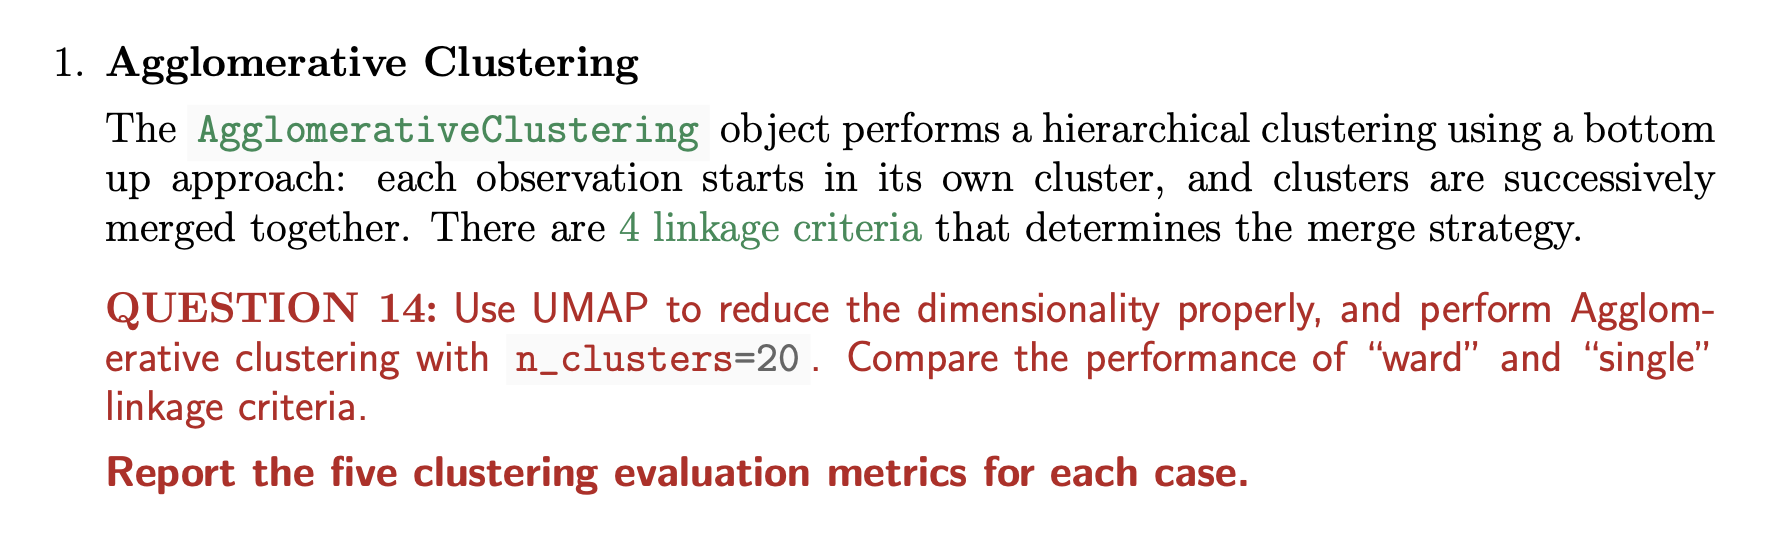

Ward Linkage Criteria

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import umap

proj_vec = umap.UMAP(n_components=200, metric='cosine').fit_transform(tfidfVectors)

proj_vec = impute_nan(proj_vec)

agg = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward').fit(proj_vec)

evaluate(labels, agg.labels_, plot=False, print_output=True)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:126: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 711 edges.
It has only fully disconnected 27 vertices.
Use umap.utils.disconnected_vertices() to identify them.



Homogeneity: 0.432
Completeness: 0.417
V-measure: 0.425
Adjusted Rand-Index: 0.275
Adjusted Mutual Information Score: 0.423


(0.4324175388854925,
 0.4172889096144559,
 0.42471854513577867,
 0.275054998505709,
 0.422826747115518)

Single Linkage Criteria

In [ ]:
agg = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='single').fit(proj_vec)

evaluate(labels, agg.labels_, plot=False, print_output=True)

Homogeneity: 0.125
Completeness: 0.009
V-measure: 0.016
Adjusted Rand-Index: 0.000
Adjusted Mutual Information Score: 0.012


(0.1254383980439497,
 0.008738324978137634,
 0.016338474545463146,
 6.785550739196756e-05,
 0.011508872072939828)

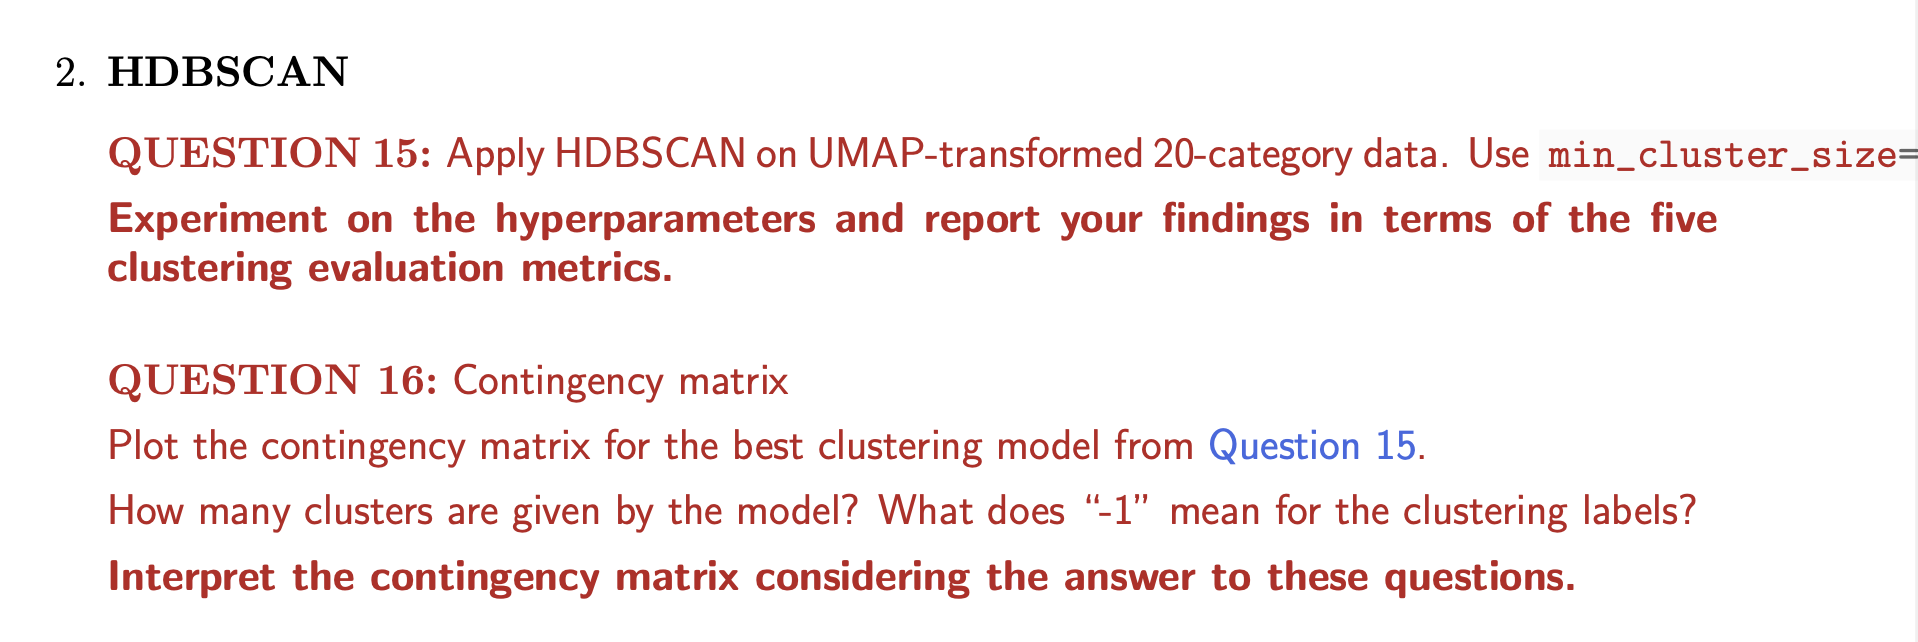

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 5.2 MB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330700 sha256=fa05538187f45844a9663500deb6d87e08fec0f2e7d21d90715c1926d6856ba8
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
import hdbscan
import umap

proj_vec = umap.UMAP(n_components=200, metric='cosine').fit_transform(tfidfVectors)

proj_vec = impute_nan(proj_vec)

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, min_samples = 1, leaf_size=40, metric='l1', min_cluster_size=42)

clusterer.fit(proj_vec)

evaluate(labels, clusterer.labels_, plot=False, print_output=True)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:126: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 632 edges.
It has only fully disconnected 26 vertices.
Use umap.utils.disconnected_vertices() to identify them.



Homogeneity: 0.357
Completeness: 0.374
V-measure: 0.365
Adjusted Rand-Index: 0.093
Adjusted Mutual Information Score: 0.357


(0.3566534737433986,
 0.37417475387778315,
 0.3652040813802982,
 0.09336119382817365,
 0.3570884588308335)

In [ ]:
len(np.unique(clusterer.labels_))

73

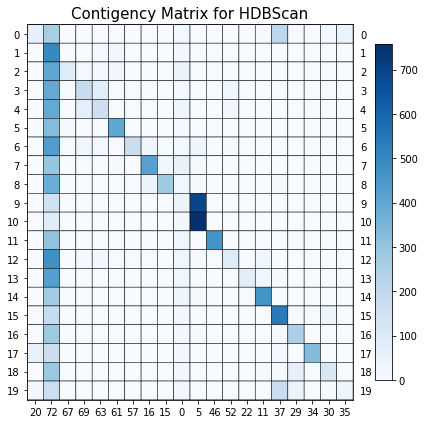

In [ ]:
from scipy.optimize import linear_sum_assignment
from plotmat import plot_mat

A = contingency_table(labels, clusterer.labels_)
rows, cols = linear_sum_assignment(A, maximize=True)
plot_mat(A[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Contigency Matrix for HDBScan', if_show_values = False, size=(6,6))

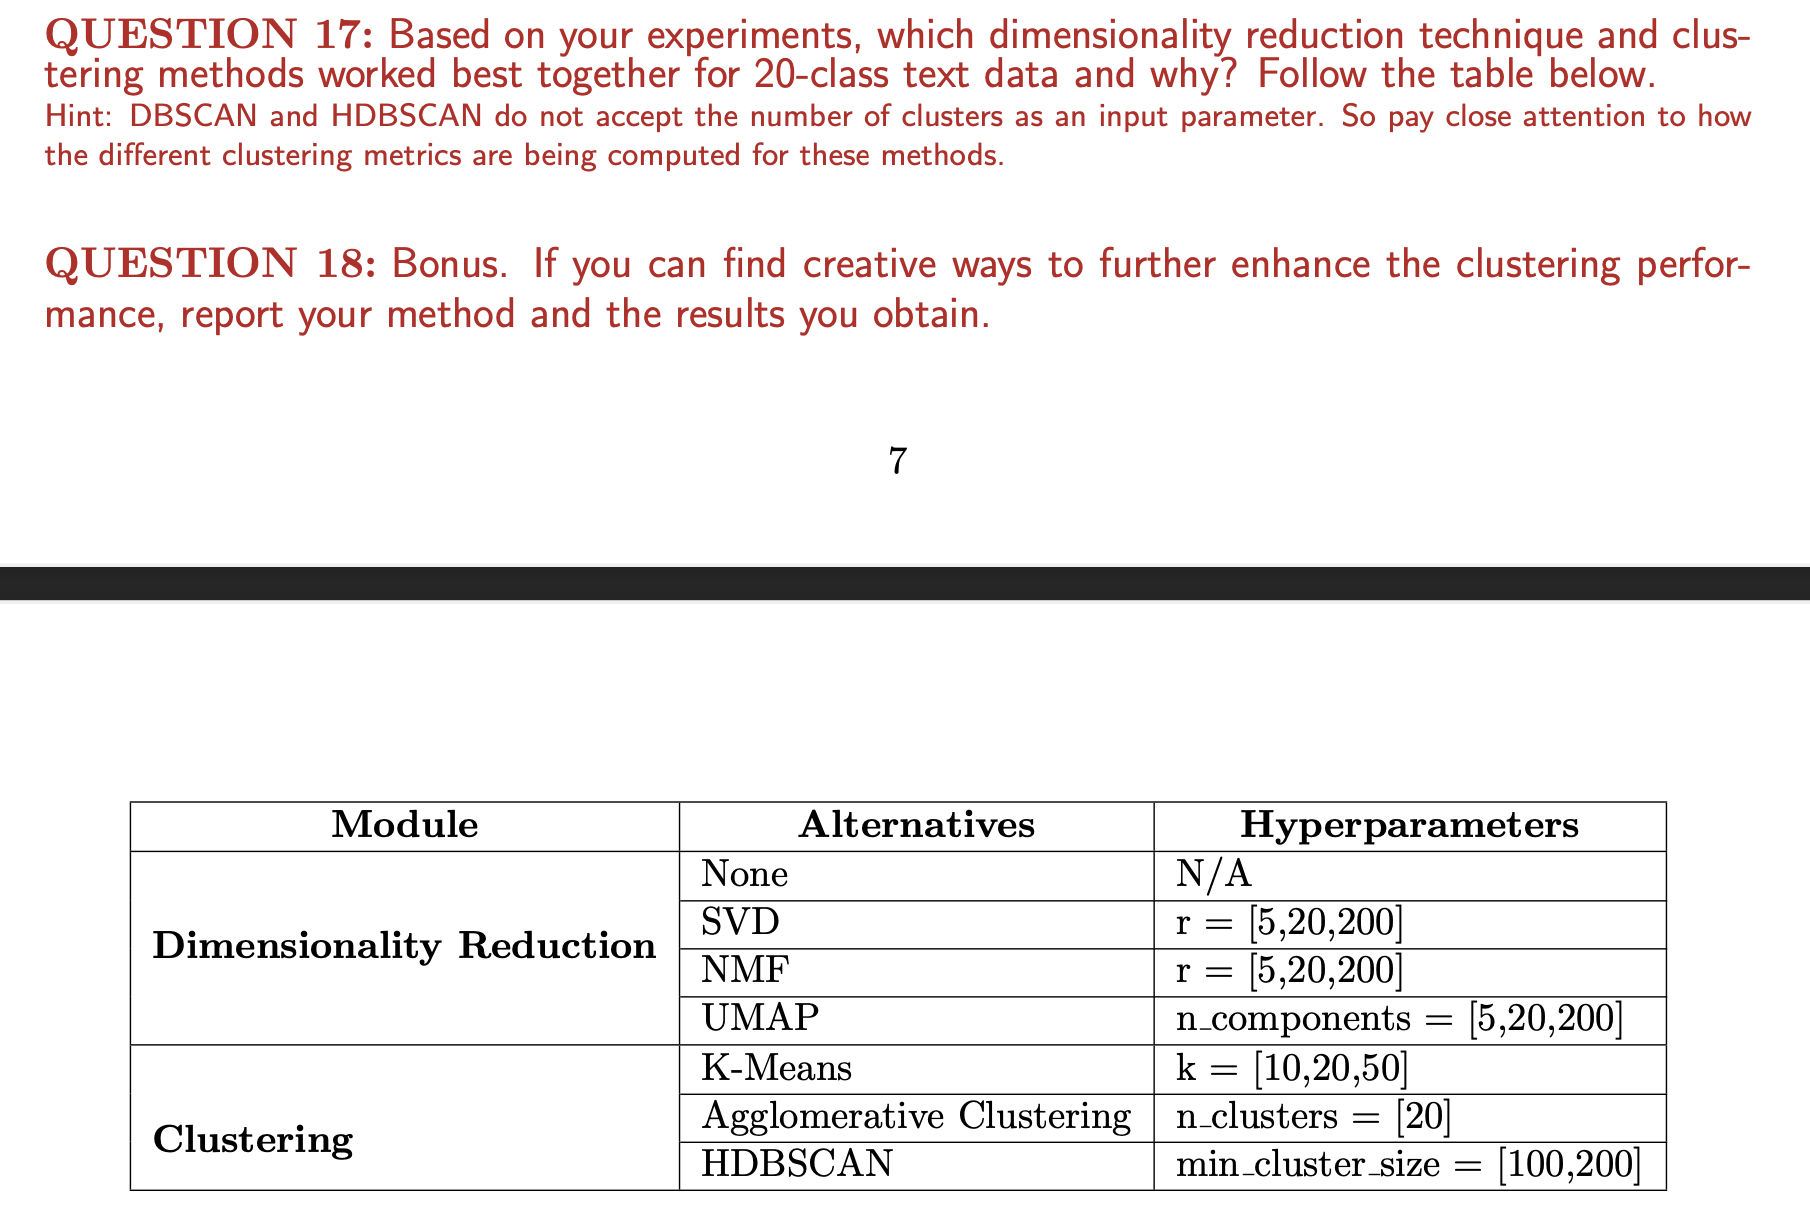

In [ ]:
from sklearn.cluster import AgglomerativeClustering

dim_param = [5, 20, 200]
k_param = [10, 20, 50]
min_clust_size = [100, 200]

metric_dict = {'kmeans': [], 'agg': [], 'hdb': []}

for i in dim_param:
  for j in k_param:
    svd = TruncatedSVD(n_components = i, random_state = 0).fit_transform(tfidfVectors)
    nmf = NMF(n_components = i, init='random', random_state=0, max_iter=500).fit_transform(tfidfVectors)
    umap_vec = umap.UMAP(n_components=i, metric='cosine').fit_transform(tfidfVectors)
    umap_vec = impute_nan(umap_vec)

    kmeans_svd = KMeans(n_clusters=j, random_state=0, max_iter=1000, n_init=30).fit(svd)
    kmeans_nmf = KMeans(n_clusters=j, random_state=0, max_iter=1000, n_init=30).fit(nmf)
    kmeans_umap = KMeans(n_clusters=j, random_state=0, max_iter=1000, n_init=30).fit(umap_vec)

    metric_dict['kmeans'].append(evaluate(labels, kmeans_svd.labels_, plot=False, print_output=False))
    metric_dict['kmeans'].append(evaluate(labels, kmeans_nmf.labels_, plot=False, print_output=False))
    metric_dict['kmeans'].append(evaluate(labels, kmeans_umap.labels_, plot=False, print_output=False))

  agg_svd = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward').fit(svd)
  agg_nmf = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward').fit(nmf)
  agg_umap = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward').fit(umap_vec)

  metric_dict['agg'].append(evaluate(labels, agg_svd.labels_, plot=False, print_output=False))
  metric_dict['agg'].append(evaluate(labels, agg_nmf.labels_, plot=False, print_output=False))
  metric_dict['agg'].append(evaluate(labels, agg_umap.labels_, plot=False, print_output=False))

  hbd_svd = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, min_samples = 1, leaf_size=40, metric='l1', min_cluster_size=100).fit(svd)
  metric_dict['hdb'].append(evaluate(labels, hbd_svd.labels_, plot=False, print_output=False))
  hbd_svd = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, min_samples = 1, leaf_size=40, metric='l1', min_cluster_size=200).fit(svd)
  metric_dict['hdb'].append(evaluate(labels, hbd_svd.labels_, plot=False, print_output=False))
  hbd_nmf = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, min_samples = 1, leaf_size=40, metric='l1', min_cluster_size=100).fit(nmf)
  metric_dict['hdb'].append(evaluate(labels, hbd_nmf.labels_, plot=False, print_output=False))
  hbd_nmf = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, min_samples = 1, leaf_size=40, metric='l1', min_cluster_size=200).fit(nmf)
  metric_dict['hdb'].append(evaluate(labels, hbd_nmf.labels_, plot=False, print_output=False))
  hbd_umap = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, min_samples = 1, leaf_size=40, metric='l1', min_cluster_size=100).fit(umap_vec)
  metric_dict['hdb'].append(evaluate(labels, hbd_umap.labels_, plot=False, print_output=False))
  hbd_umap = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, min_samples = 1, leaf_size=40, metric='l1', min_cluster_size=200).fit(umap_vec)
  metric_dict['hdb'].append(evaluate(labels, hbd_umap.labels_, plot=False, print_output=False))

    


In [ ]:
metric_dict

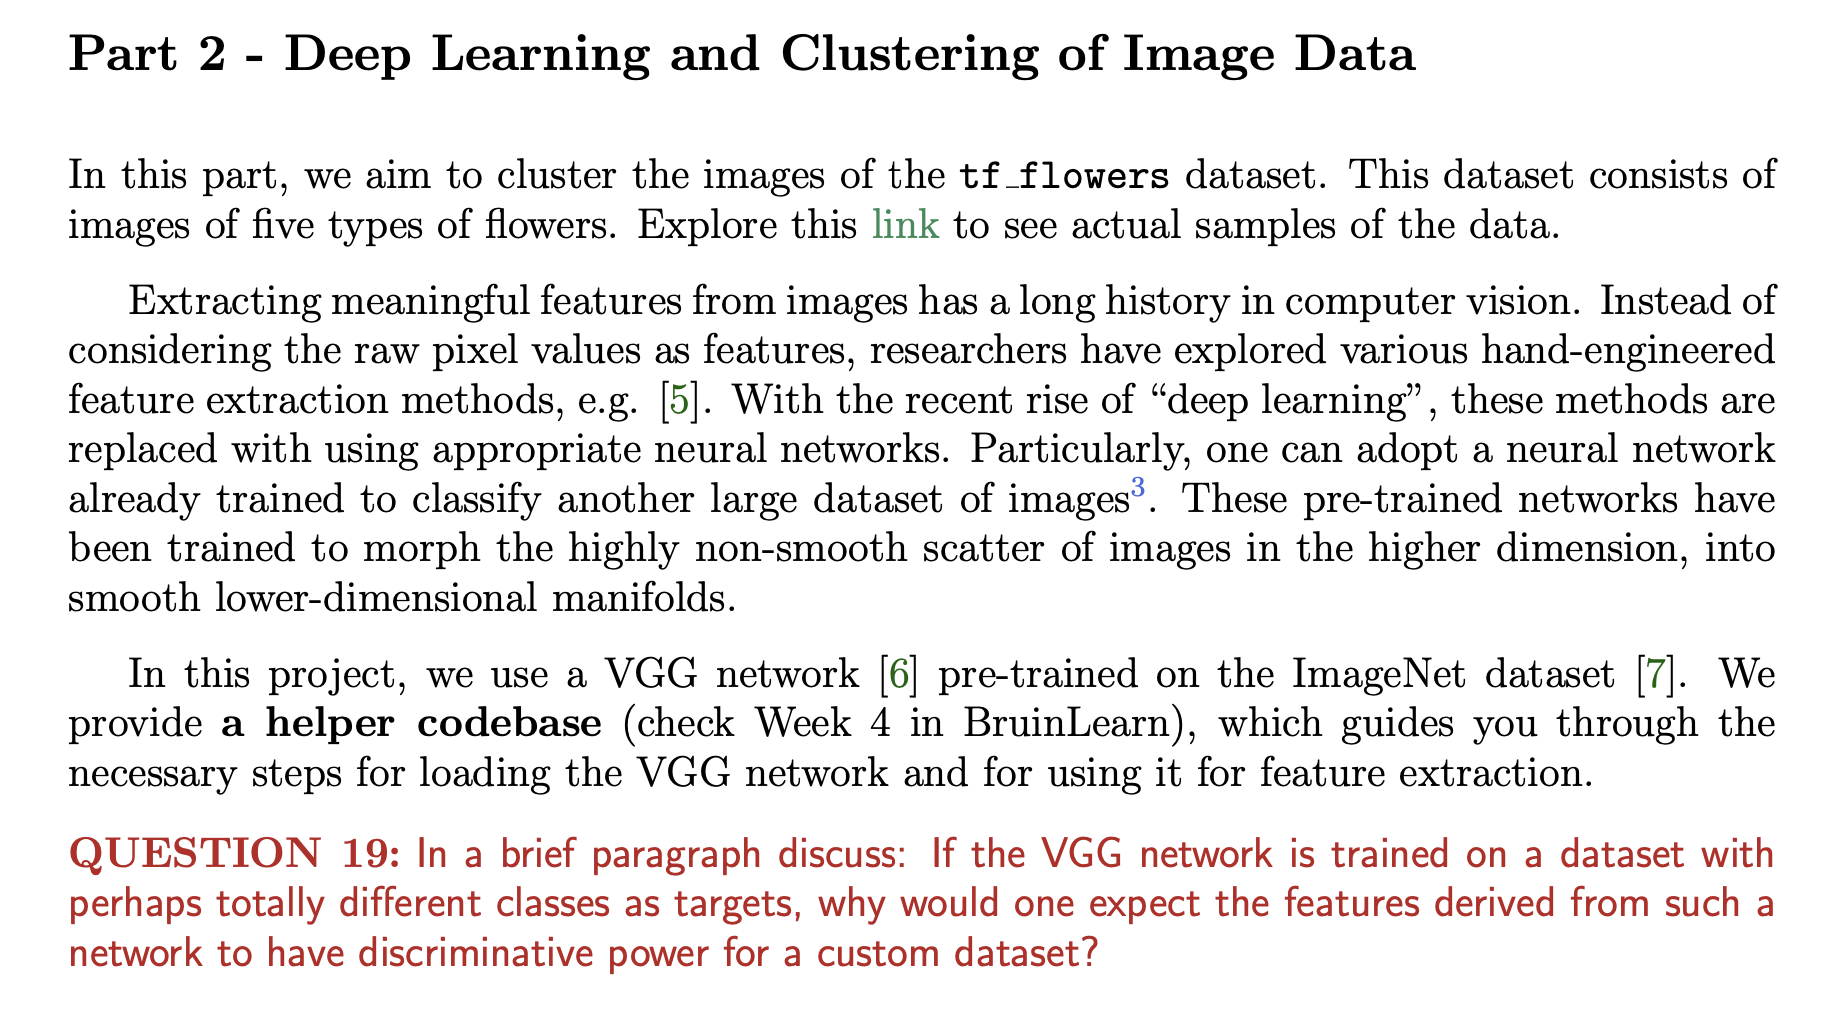

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

## Helper Functions

In [ ]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out) 
            return out 

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None
        
    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))
    
    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    
    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self     
        
    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), 
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()
    
    
    def forward(self, X):
        return self.model(X)
    
    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')
        self.model.train()
        self.criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)
        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                y_pred = self.forward(X_)
                loss = self.criterion(y_pred.squeeze(), y_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        return self
    
    def eval(self, X_test, y_test):
        X_test = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y_test = torch.tensor(y_test, dtype=torch.int64, device='cuda')
        self.model.eval()
        self.y_pred = self.model(X_test)
        after_train = self.criterion(self.y_pred.squeeze(), y_test)
        print('\nTest loss after Training' , after_train.item())

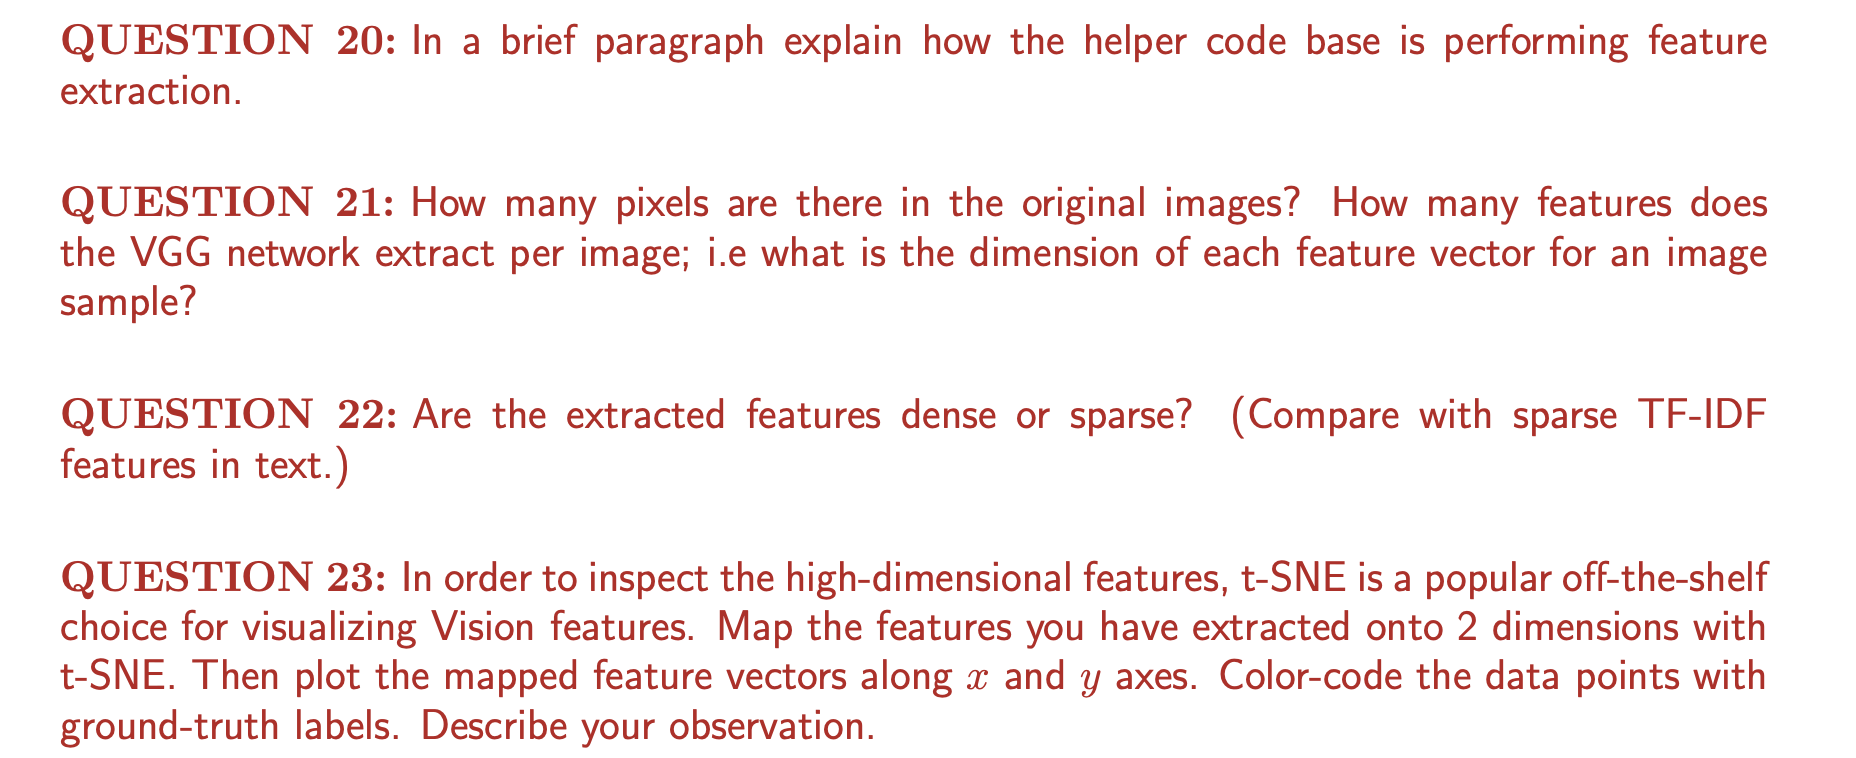

In [ ]:
print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]
len(np.unique(y_all))

(3670, 4096) (3670,)


5

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, init='random').fit_transform(f_all)

plot_embedding(X_embedded, title='VGG Features Dim. Reduced by tSNE', num_Classes=5, truth_classes=y_all)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



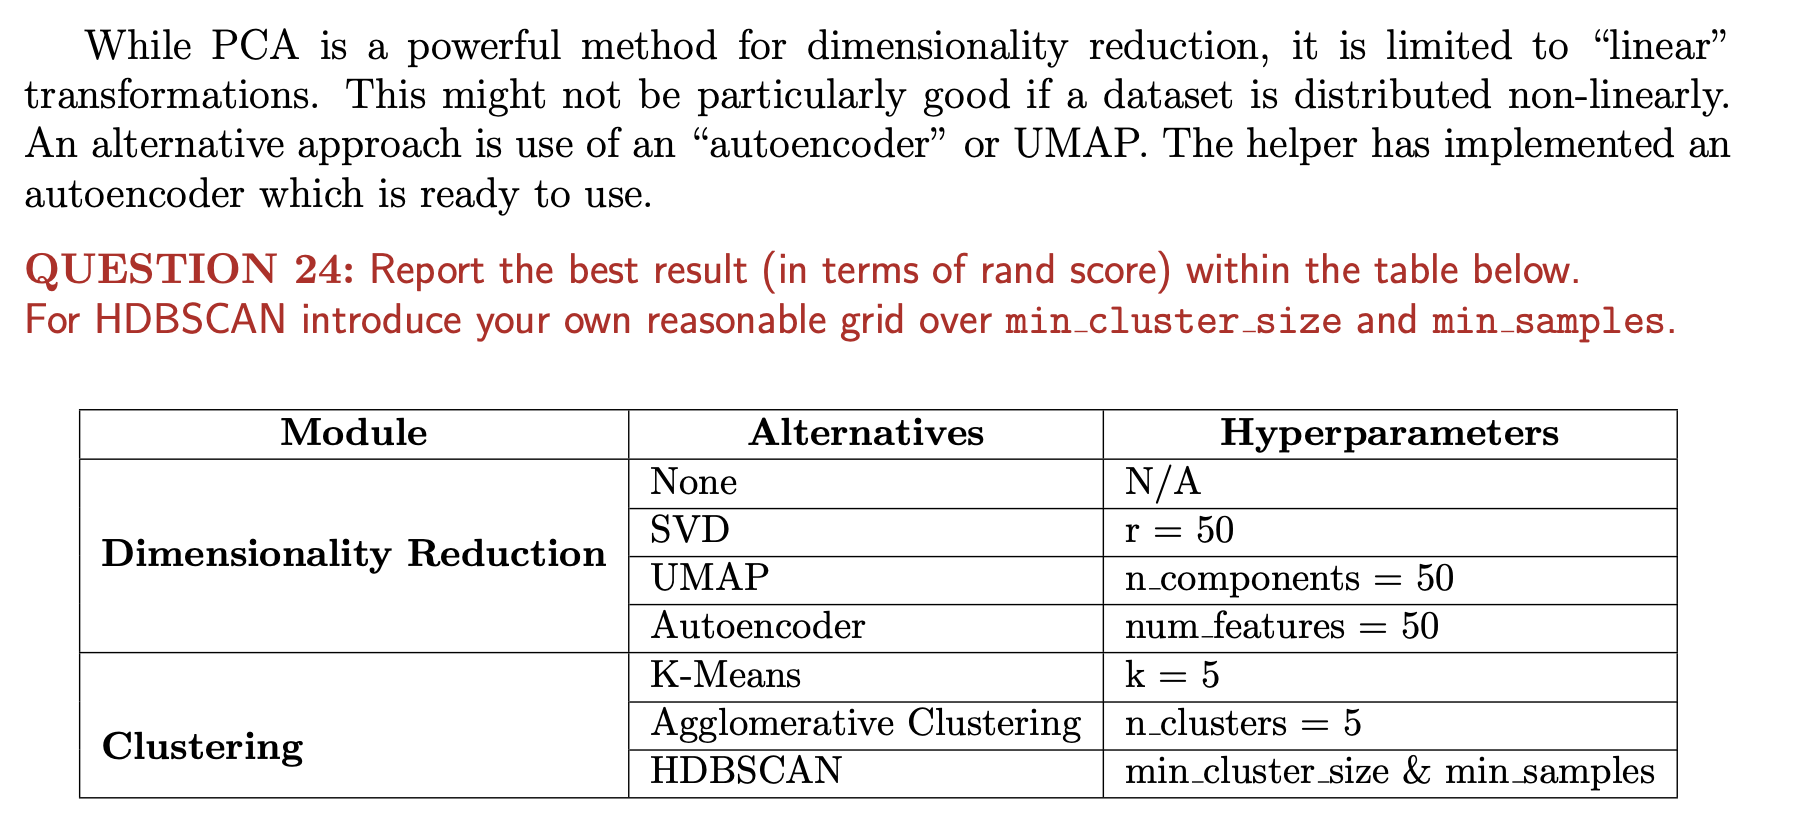

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 5.2 MB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330821 sha256=f94acfc17d73753e67b79ee519f87da08bfc232e420ae729fe3746890cd7bcf4
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
pip install scipy

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import umap
import hdbscan


min_cluster_size = [5, 10, 20, 50]
min_samples = [1, 2, 5, 10]

scaler = MinMaxScaler()

metric_dict = {'kmeans': [], 'agg': [], 'hdb': []}

svd = TruncatedSVD(n_components = 50, random_state = 0).fit_transform(f_all)
auto =Autoencoder(2).fit_transform(f_all)
umap_vec = umap.UMAP(n_components=50, metric='cosine').fit_transform(f_all)
umap_vec = impute_nan(umap_vec)

kmeans_svd = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(svd)
kmeans_auto = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(auto)
kmeans_umap = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(umap_vec)

metric_dict['kmeans'].append(evaluate(y_all, kmeans_svd.labels_, plot=False, print_output=False))
metric_dict['kmeans'].append(evaluate(y_all, kmeans_auto.labels_, plot=False, print_output=False))
metric_dict['kmeans'].append(evaluate(y_all, kmeans_umap.labels_, plot=False, print_output=False))

agg_svd = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(svd)
agg_auto = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(auto)
agg_umap = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(umap_vec)

metric_dict['agg'].append(evaluate(y_all, agg_svd.labels_, plot=False, print_output=False))
metric_dict['agg'].append(evaluate(y_all, agg_auto.labels_, plot=False, print_output=False))
metric_dict['agg'].append(evaluate(y_all, agg_umap.labels_, plot=False, print_output=False))

for i in min_cluster_size:
  for j in min_samples:
    hbd_svd = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, min_samples = j, leaf_size=40, metric='l1', min_cluster_size=i).fit(svd)
    metric_dict['hdb'].append(evaluate(y_all, hbd_svd.labels_, plot=False, print_output=False))
    hbd_auto = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, min_samples = j, leaf_size=40, metric='l1', min_cluster_size=i).fit(auto)
    metric_dict['hdb'].append(evaluate(y_all, hbd_auto.labels_, plot=False, print_output=False))
    hbd_umap = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, min_samples = j, leaf_size=40, metric='l1', min_cluster_size=i).fit(umap_vec)
    metric_dict['hdb'].append(evaluate(y_all, hbd_umap.labels_, plot=False, print_output=False))


100%|██████████| 100/100 [00:26<00:00,  3.71it/s]
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [ ]:
metric_dict['hdb'][2]

(0.2547470842296975,
 0.646501742516197,
 0.36548049543670613,
 0.18828992470460928,
 0.33406071845783525)

In [ ]:
print('Max Agg:', max(metric_dict['agg'][k][3] for k in range(3)))
print('KMeans:', max(metric_dict['kmeans'][k][3] for k in range(3)))
print('HDB:', max(metric_dict['hdb'][k][3] for k in range(48)))

Max Agg: 0.4587931862153174
KMeans: 0.46685888361532213
HDB: 0.18828992470460928


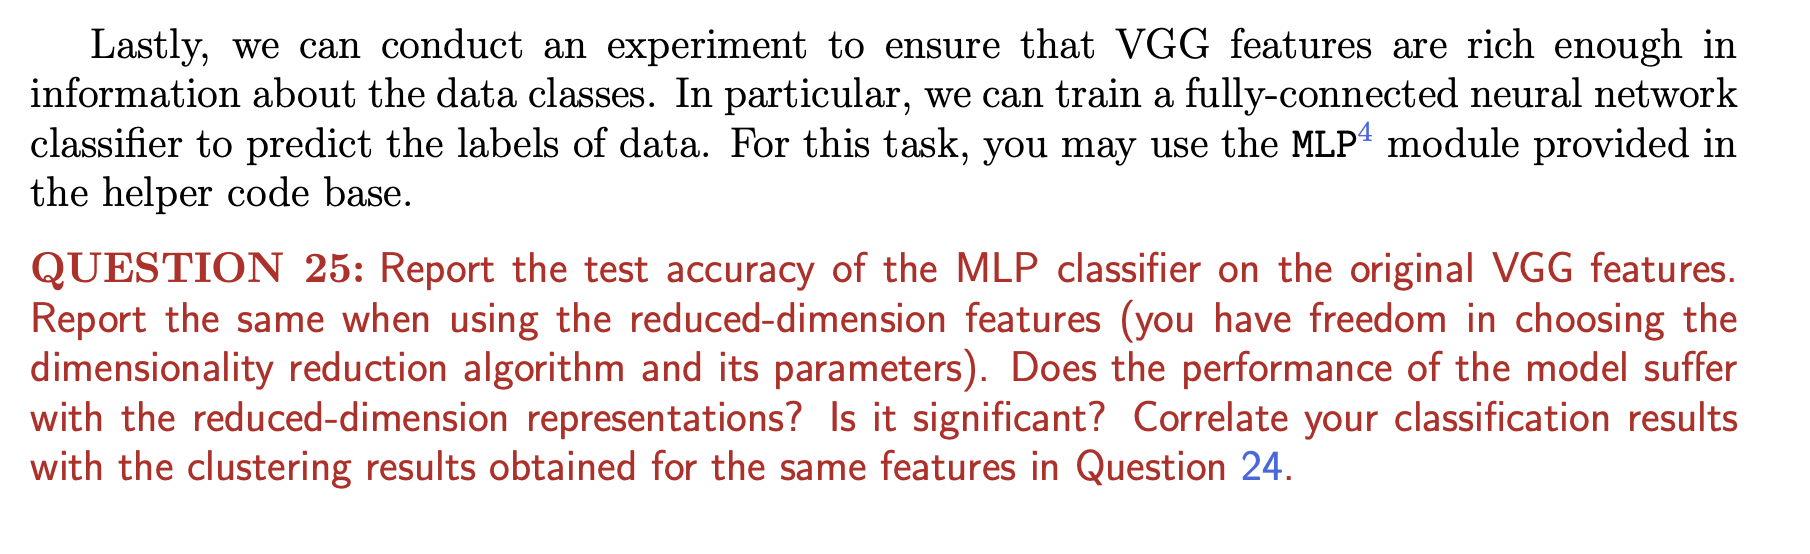

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(f_all, y_all, test_size=0.2, random_state=42)

values = [int(i) for i in y_train]
n_values = np.max(values) + 1
y_train_encoded = np.eye(n_values)[values]

mlp = MLP(4096)
mlp.train(X_train, y_train)
mlp.eval(X_test, y_test)

100%|██████████| 100/100 [00:07<00:00, 12.86it/s]


Test loss after Training 0.6877411603927612


##Training MLP on Dim. Reduced VGG Features

In [ ]:
from sklearn.model_selection import train_test_split

umap_vec = umap.UMAP(n_components=50, metric='cosine').fit_transform(f_all)
umap_vec = impute_nan(umap_vec)

nfeat = umap_vec.shape[1]

X_train, X_test, y_train, y_test = train_test_split(umap_vec, y_all, test_size=0.2, random_state=42)

mlp = MLP(nfeat)
mlp.train(X_train, y_train)
mlp.eval(X_test, y_test)

100%|██████████| 100/100 [00:04<00:00, 20.77it/s]


Test loss after Training 0.4726303815841675


In [ ]:
np_arr = mlp.y_pred.cpu().detach().numpy()
# np.max(np_arr, axis=1).shape